<a href="https://colab.research.google.com/github/kirankokateGitHub/UnsupervisedML2/blob/main/Kiran_unsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Kiran

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kirankokateGitHub/UnsupervisedML2

# **Problem Statement**


**Write Problem Statement Here.**

The objective of this undertaking is to examine the collection of movies and TV shows on Netflix, sourced from the third-party search engine Flixable, and categorize them into meaningful clusters. This effort aims to improve user satisfaction and reduce subscriber attrition for Netflix, the leading online streaming service provider globally, with a subscriber base exceeding 220 million as of the second quarter of 2022. By delving into the dataset, encompassing content available up to 2019, we intend to reveal fresh perspectives and patterns in the swiftly expanding domain of streaming entertainment.

The dataset encompasses TV shows and movies accessible on Netflix up until 2019, sourced from the third-party Netflix search engine, Flixable. In 2018, an intriguing report from Flixable highlighted a remarkable trend: the count of TV shows on Netflix had nearly tripled since 2010. During the same period, the collection of movies had diminished by over 2,000 titles, while TV show availability had experienced a nearly threefold increase. Exploring this dataset promises to reveal a wealth of additional insights awaiting discovery.

Furthermore, the potential for enriching this dataset by integrating it with external data sources like IMDB ratings





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [177]:
# Let's import all required Libraries and modules

# libraries that are usefull for  data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# library for Word Cloud
from wordcloud import WordCloud, STOPWORDS

# Textual data libraries
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries to be usefull to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library for ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [178]:
# Load Dataset
path= '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
# Let's make a netfix dataframe named as 'nfdf'
nfdf=pd.read_csv(path)

### Dataset First View

In [179]:
# Dataset First Look
nfdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [180]:
nfdf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [181]:
nfdf.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2864,s2865,TV Show,Humsafar,NaN,"Fawad Khan, Mahira Khan, Atiqa Odho, Naveen Wa...",Pakistan,"December 15, 2016",2011,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","To fulfill her mother's dying wish, middle-cla..."
7613,s7614,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",Giles Yeo,United Kingdom,"February 1, 2019",2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...
5618,s5619,TV Show,Sin Senos sí Hay Paraíso,NaN,"Majida Issa, Fabián Ríos, Catherine Siachoque,...","United States, Colombia","January 11, 2019",2018,TV-MA,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",Born into a small town controlled by the mafia...
201,s202,Movie,A Love Story,Maryo J. De los Reyes,"Maricel Soriano, Aga Muhlach, Angelica Pangani...",Philippines,"March 14, 2019",2007,TV-14,117 min,"Dramas, International Movies, Romantic Movies",Self-made millionaire Ian thinks he's found ha...
920,s921,Movie,Bill Hicks: Reflections,NaN,"Bill Hicks, Steve Hicks",NaN,"December 31, 2018",2015,TV-MA,34 min,Documentaries,This documentary about comedian Bill Hicks off...


### Dataset Rows & Columns count

In [182]:
# Dataset Rows & Columns count
nfdf.shape

(7787, 12)

### Dataset Information

In [183]:
# Dataset Info
nfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [184]:
# Dataset Duplicate Value Count
nfdf.duplicated().sum()

0

No duplicated values has been found.

#### Missing Values/Null Values

In [185]:
# Missing Values/Null Values Count
nfdf.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

below variables/columns has mentioned null values.

director        2389

cast             718

country          507

date_added        10

rating             7

In [186]:
# let's check the percentage of missing/null values.
round((nfdf.isna().sum()/len(nfdf))*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

Respective variable with it's missing values in percetage are as follows:

director    -    30.68 %

cast       -      9.22 %

country       -   6.51 %

date_added   -    0.13 %

rating       -    0.09 %

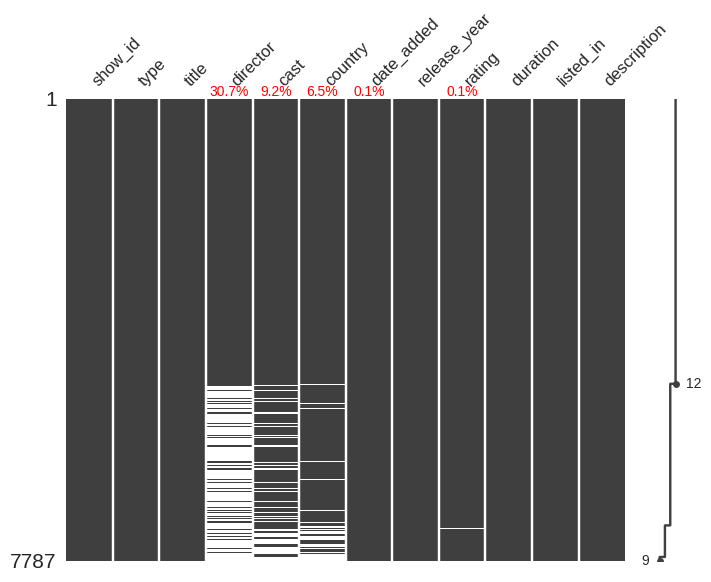

In [187]:
# Visualizing the missing values
# Import missing number library to visualise the missing numbers.
import missingno as msno
# Calculate the percentage of missing values for each column
missing_percentage = nfdf.isnull().mean() * 100

# Create the matrix plot
matrix_plot = msno.matrix(
    nfdf,          # DataFrame containing the data you want to visualize
    sort='descending', # Sorting order for the matrix ('ascending', 'descending', or None)
    figsize=(8, 6),    # Figure size (width, height) in inches
    fontsize=12       # Font size for text in the plot
)

# Add missing value percentages as annotations to the plot
for i, percentage in enumerate(missing_percentage):
    if percentage > 0:
        matrix_plot.annotate(
            f'{percentage:.1f}%',   # Format the percentage with one decimal place
            (i, 1),                  # Position of the annotation (column index, y-coordinate)
            color='red',             # Color of the annotation
            fontsize=10,             # Font size for the annotation text
            ha='center',             # Horizontal alignment
            va='bottom'              # Vertical alignment
        )

plt.show()  # Display the plot

### What did you know about your dataset?

The dataset, with 7787 rows and 12 columns, pertains to the online streaming industry. Our tasks include exploring the dataset, creating clustering methods, and building a content-based recommendation system.

Clustering involves grouping similar data points together to identify inherent patterns. We'll employ clustering algorithms to uncover these patterns without prior knowledge of the groups.

Certain columns such as 'director,' 'cast,' 'country,' 'date_added,' and 'rating' contain missing values. Since each row represents a specific movie, traditional imputation isn't feasible. To retain data and considering the dataset size, we'll impute numeric values using empty strings.





Answer Here

## ***2. Understanding Your Variables***

In [188]:
# Dataset Columns
nfdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [189]:
# Dataset Describe
nfdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN




There are 7787 unique entries for show IDs and titles.

The majority of entries are labeled as "Movie" (5377) compared to other types.

The director "Raúl Campos, Jan Suter" appears most frequently (18 times).


"David Attenborough" is the most common cast member (18 times).

"United States" is the top country (2555 times) in terms of content.

Content was most frequently added on "January 1, 2020" (118 times).

The release years span from 1925 to 2021, with an average of around 2013.

"TV-MA" is the predominant rating (2863 times).

"1 Season" is the most common duration (1608 times).

"Documentaries" is the leading category (334 times).

The most frequent description involves missing husbands (3 times).

### Variables Description

Show_id : Unique ID for every Movie / Tv Show

Type : Identifier - A Movie or TV Show

Title : Title of the Movie / Tv Show

Director : Director of the Movie

Cast : Actors involved in the movie / show

Country : Country where the movie / show was produced

Date_added : Date it was added on Netflix

Release_year : Actual Releaseyear of the movie / show

Rating : TV Rating of the movie / show

Duration : Total Duration - in minutes or number of seasons

Listed_in : Genere

Description: The Summary description

### Check Unique Values for each variable.

In [190]:
# Check Unique Values for each variable.
nfdf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [191]:
# Write your code to make your dataset analysis ready.
# Let's Handling null/missing values

# Fill the null values of features 'director', 'cast' and 'country' with "Director Unavailable", "Cast Unavailable" and "Country Unavailable" respectively.
nfdf.director.fillna("Director Unavailable", inplace = True)
nfdf.cast.fillna("Cast Unavailable", inplace = True)
nfdf.country.fillna("Country Unavailable", inplace = True)

#  Now Drop null/missing values from 'date_added' and 'rating columns'.
nfdf.dropna(subset=["date_added",'rating'], inplace=True)

Given the prevalence of null values in columns like director, cast, and country, outright removal is impractical.

Therefore, we've replaced these nulls with placeholders: "Director Unavailable," "Cast Unavailable," and "Country Unavailable."

Conversely, for columns like date_added and rating, which exhibit minimal null entries, we've opted to eliminate those instances.

In [192]:
# Let's cross Check for null/missing values are that eliminated or not.
nfdf.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [193]:
# Let's check shape of null free dataset.
nfdf.shape

(7770, 12)

Now No. of rows are 7770.

**Let's Handle Outliers**

In [194]:
# Let's find Categorical variables present the dataframe
cat_var = [var for var in nfdf.describe(include='object')]
print(f'Dataframe having {len(cat_var)} categorical variables as follows:')
print(cat_var)

Dataframe having 11 categorical variables as follows:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [195]:
# Let's Find numerical variables presen in the dataframe
num_var = [var for var in nfdf.columns if var not in cat_var]
print(f'Datframe having {len(num_var)} numerical variables as follows:')
print(num_var)

Datframe having 1 numerical variables as follows:
['release_year']


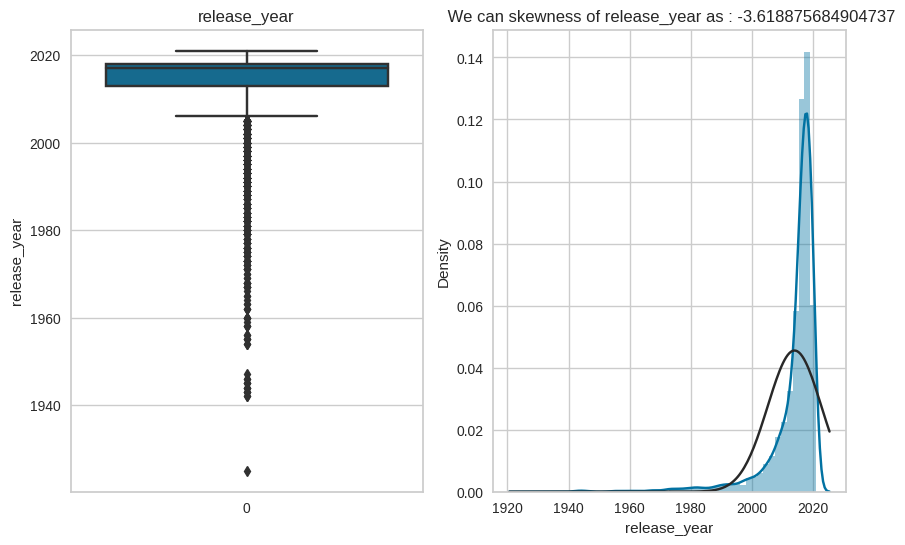

In [196]:
# Let's Check for outliers in numerical data typed variables by using boxplot

# Import library to check normality in distribution
from scipy.stats import norm

# Let's Plot Box and Distribution plot using 'for' loop

for var in num_var:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data = nfdf[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(nfdf[var], fit=norm)
    ax.set_title(f' We can skewness of {var} as : {nfdf[var].skew()}')
    ax.set_xlabel(var)
    plt.show()

In [197]:
# Use Inter Quartile Range to remove outliers from numerical variables of the dataframe

# Let's find IQR
Q1 = nfdf['release_year'].quantile(0.25)
Q3 = nfdf['release_year'].quantile(0.75)
IQR = Q3-Q1

# Defining upper and lower limit
lower_limit = nfdf['release_year'].quantile(0.25)-1.5*IQR
upper_limit = nfdf['release_year'].quantile(0.75)+1.5*IQR

# Applying lower and upper limit
nfdf.loc[(nfdf['release_year'] > upper_limit), 'release_year'] = upper_limit
nfdf.loc[(nfdf['release_year'] < lower_limit), 'release_year'] = lower_limit

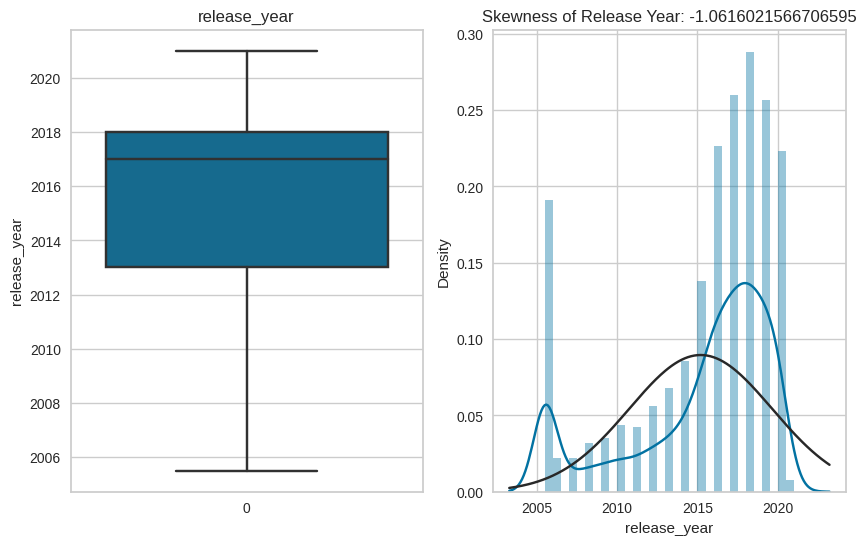

In [198]:
## Let's check outliers in 'release year' after removed by IQR Using boxplot

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ax=sns.boxplot(data = nfdf['release_year'])
ax.set_title('release_year')
ax.set_ylabel('release_year')

plt.subplot(1,2,2)
ax=sns.distplot(nfdf['release_year'], fit=norm)
ax.set_title(f"Skewness of Release Year: {nfdf['release_year'].skew()}")
ax.set_xlabel('release_year')
plt.show()


Outliers in the 'release_year' variable have been effectively managed using the interquartile range method.

**Feature Engineering**

In [199]:
# Let's check dataframe i.e head
nfdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [200]:
# Let's Ensure that variables are in the correct data types
nfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   date_added    7770 non-null   object 
 7   release_year  7770 non-null   float64
 8   rating        7770 non-null   object 
 9   duration      7770 non-null   object 
 10  listed_in     7770 non-null   object 
 11  description   7770 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.0+ MB


In [201]:
# Let's Convert the data types of variabless 'date_added' and 'release_year' to the appropriate data types
nfdf.date_added = pd.to_datetime(nfdf['date_added'])
nfdf.release_year = nfdf.release_year.astype('int64')

# Rename the name of variable 'listed_in' to 'genre'
nfdf.rename = nfdf.rename(columns={'listed_in':'geners'}, inplace=True)

In [202]:
# Add the new variabble based on variable 'date_added'.
nfdf['yyyy_added'] = nfdf['date_added'].dt.year
nfdf['mm_added'] = nfdf['date_added'].dt.month
nfdf['dd_added']= nfdf['date_added'].dt.day

# Now drop variable 'date_added'.
nfdf = nfdf.drop('date_added', axis='columns')
nfdf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [203]:
nfdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'geners', 'description',
       'yyyy_added', 'mm_added', 'dd_added'],
      dtype='object')

In [204]:
nfdf.shape

(7770, 14)

### What all manipulations have you done and insights you found?

The dataset contains no duplicate values. Null values are present in 30.68% of the 'director' column, 9.22% of the 'cast' column, 6.51% of the 'country' column, 0.13% of the 'date_added' column, and 0.09% of the 'rating' column.

To address the substantial null values in 'director,' 'cast,' and 'country,' we've replaced them with "Director Unavailable," "Cast Unavailable," and "Country Unavailable," respectively. Meanwhile, the 'date_added' and 'rating' columns, which have minimal null values, have been dropped.

Outliers within the 'release_year' variable have been successfully managed using the interquartile range technique.

The 'date_added' feature was transformed into datetime format, yielding new attributes such as 'year_added,' 'month_added,' and 'day_added.' Subsequently, the original 'date_added' feature was removed.

The 'listed_in' feature has been renamed as 'genres.'

Lastly, recognizing that years should not be represented as floats, the data type of the 'release_year' feature was converted from float64 to int64.

**EDA Part**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [205]:
# Let's Create new data frame that having all TV shows
tvdf = nfdf[nfdf.type=='TV Show']
tvdf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Director Unavailable,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,30
12,s13,TV Show,1994,Diego Enrique Osorno,Cast Unavailable,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,17
16,s17,TV Show,Feb-09,Director Unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,20


In [206]:
# LEt's Create a new dataframe that having all movies
mvdf = nfdf[nfdf.type == 'Movie']
mvdf.head(4)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


**Let's do Univariate Analysis**

In [207]:
# Define T to autofit the numbers and size of plot.
T = int(len(nfdf.columns))

In [208]:
# Now define a function to Notate the percentage count of each value on the bars

def annote_percentage(axes):
    '''Take the axes as input and label the percentage count for each bar in a countplot'''
    for i in plot.patches:
        total = sum(i.get_height() for i in plot.patches)/100
        percentage = round((i.get_height()/total),2)
        X = i.get_x() + i.get_width()/2
        Y = i.get_height()
        plot.annotate(f'{percentage}%', (X, Y), ha='center', va='bottom')

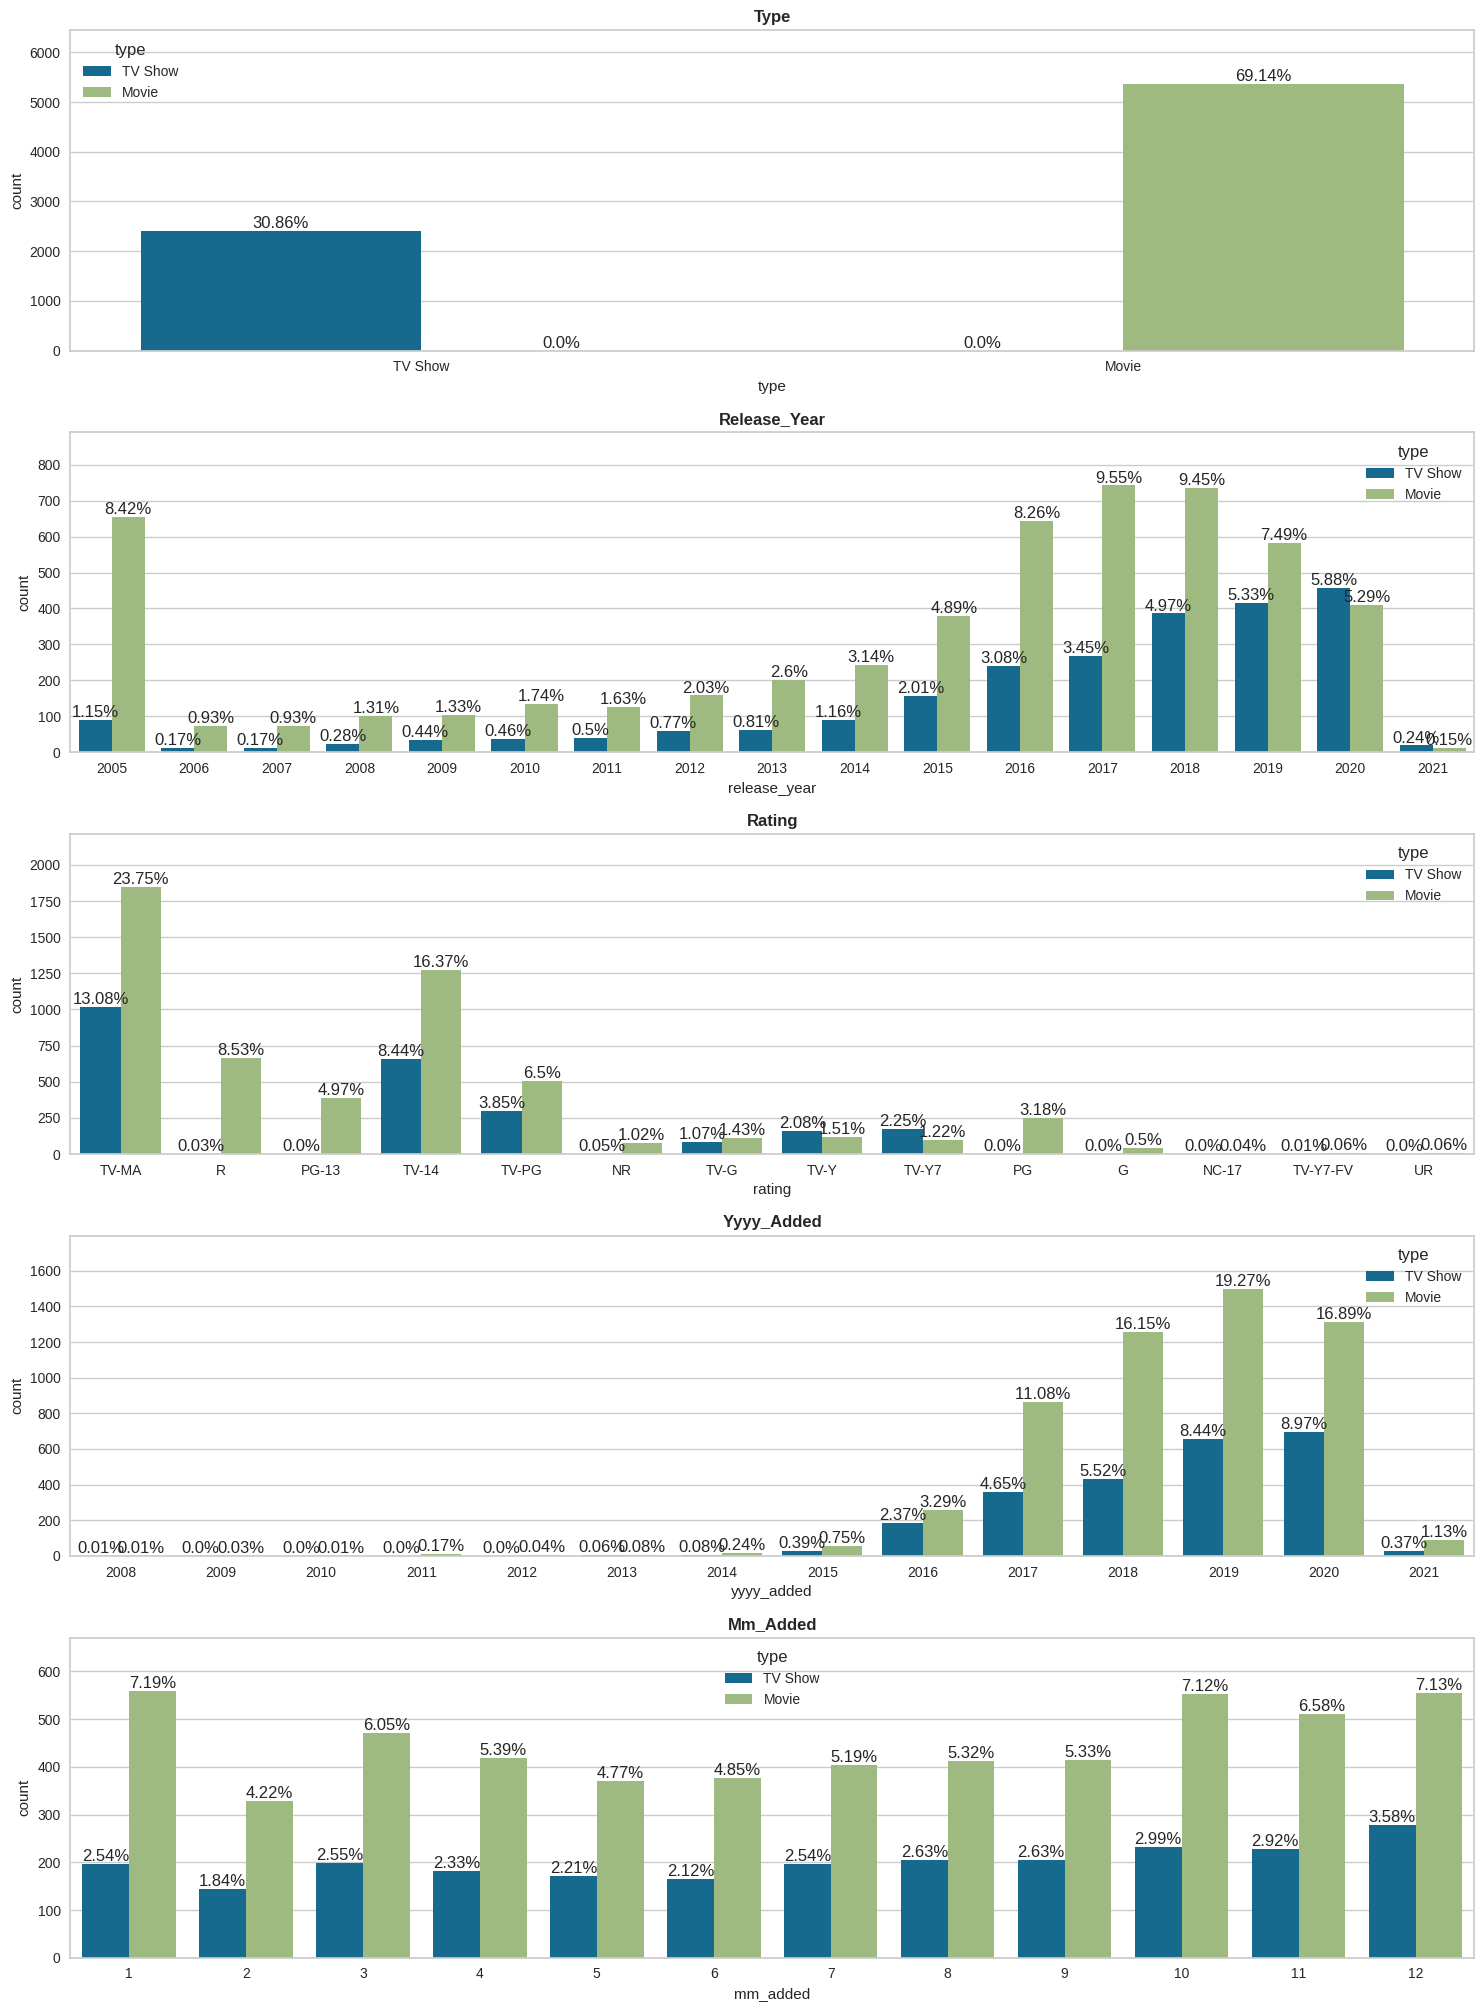

In [209]:
# Let's Plot the countplots of each variable in target_variables

# Let's Obtain the target variable that having maximum 20 categories in features
tar_var = [var for var in nfdf.columns if len(nfdf[var].value_counts()) < 20]

plt.figure(figsize=(15, T*4))
for m,var in enumerate(tar_var):
    plot = plt.subplot(T, 1, m+1)
    ax = sns.countplot(x = nfdf[var], hue=nfdf['type']).margins(y=0.20)
    plt.title(f'{var.title()}', weight='bold')
    plt.tight_layout()
    annote_percentage(plot)

**Observations found:**

Netflix offers a higher percentage of movies (69.14%) compared to TV shows (30.86%).

Most Netflix movies were released between 2015 and 2020, while the bulk of Netflix TV shows came out from 2018 to 2020.

For release years, 2017 saw the highest movie releases, while 2020 marked the peak for TV show releases on Netflix.

From 2006 to 2019, Netflix consistently introduced more new movies than TV shows. However, in 2020, the trend shifted, with more TV shows than movies, indicating a focus shift towards TV content.

The years 2020 and 2021 will witness the greatest number of TV show releases on Netflix.

A significant portion of both TV shows and movies on Netflix carry a TV-MA rating, followed by TV-14.

Content additions in 2019 were predominantly movies, while TV shows took the lead in 2020.

In 2019, around 27.71% of all content additions were made by Netflix.

Content influx was prominent in October and January, though consistent throughout the year.

**Let's do Bivariate Analysis**

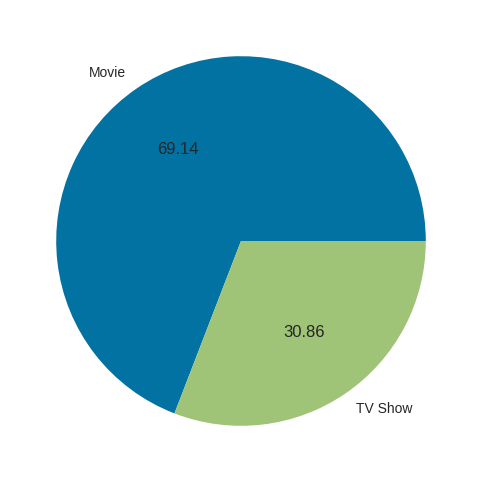

In [210]:
# LEt's find No. of Movies and TV shows that are available on Netflix.

plt.figure(figsize=(8,6))

# Define the data
type_df = nfdf.groupby(by='type').size()

# Now Plot the data
plt.pie(type_df, labels=['Movie','TV Show'], autopct='%.2f')

plt.show()

Netflix boasts a larger collection of movies (69.14%) in comparison to TV shows (30.86%).

<Figure size 600x400 with 0 Axes>

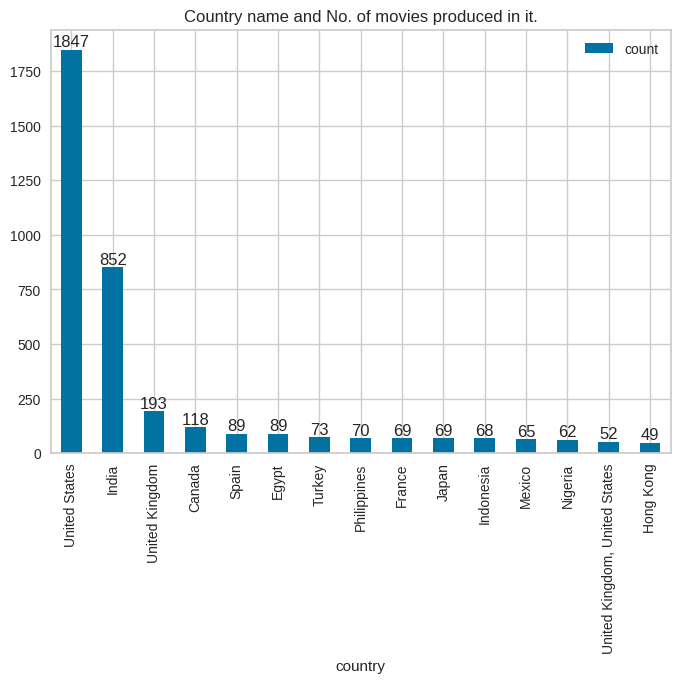

In [211]:
# let's find the country where the maximun movies are produced.

# Now Create a dataframe as 'mv_ctry_df'.
mv_ctry_df = pd.DataFrame(mvdf.groupby(by='country').size()).sort_values(by= 0, ascending = False)
mv_ctry_df.rename(columns={0:'count'}, inplace=True)

# Let's remove the observations where the country data is not available
mv_ctry_df = mv_ctry_df[mv_ctry_df.index != 'Country Unavailable']

plt.figure(figsize=(6,4))

# Let's plot a bar graph to show top 15 countries.
ax = mv_ctry_df.head(15).plot(kind='bar')

ax.bar_label(ax.containers[0])
plt.title('Country name and No. of movies produced in it.')

plt.show()

The primary source of movies on Netflix is the United States, followed by India. hong kong is last in list.

<Figure size 600x400 with 0 Axes>

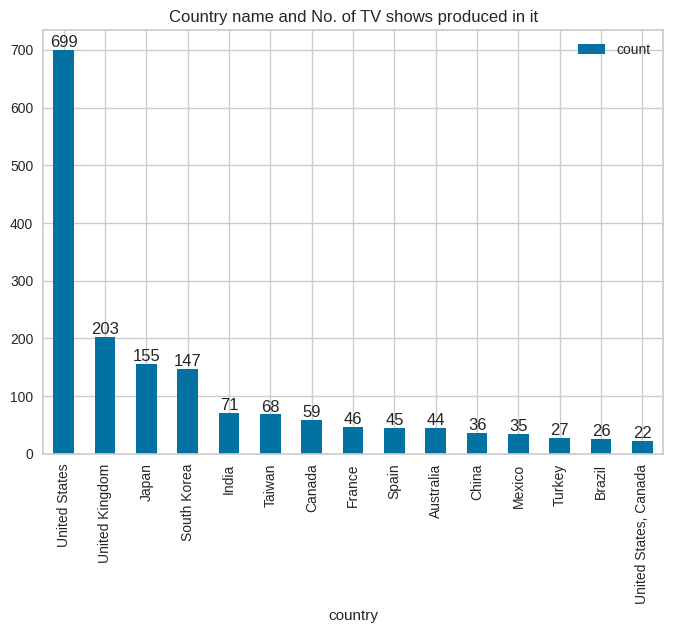

In [212]:
# Let's find the country in which maximun TV shows are produced.

# Now create a dataframe as 'tv_ctry_df'.
tv_ctry_df = pd.DataFrame(tvdf.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_ctry_df.rename(columns={0:'count'}, inplace=True)

# Let's remove the fied where the country data is not available
tv_ctry_df = tv_ctry_df[tv_ctry_df.index != 'Country Unavailable']

plt.figure(figsize=(6,4))

# Let's plot bar graph for top 15 countries.
ax = tv_ctry_df.head(15).plot(kind='bar')

plt.title('Country name and No. of TV shows produced in it')
ax.bar_label(ax.containers[0])

plt.show()

Among the TV shows accessible on Netflix, the United States and the United Kingdom stand out as the top two producing countries. Canada is at last in the list.







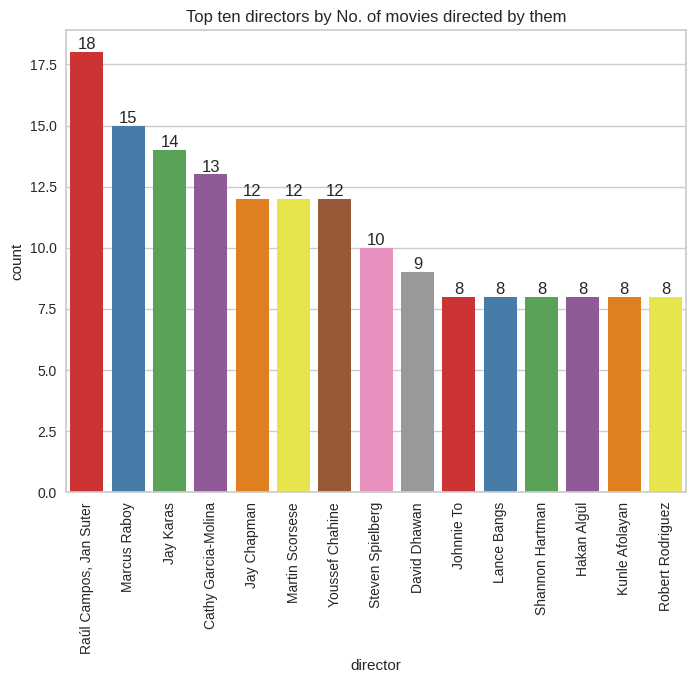

In [213]:
# let's find the directors of the majority of the movies

# Let's remove the fields which have "director unavailable".
mvdf = mvdf[mvdf['director'] != 'Director Unavailable']

# Set size of plot
plt.figure(figsize=(8,6))

# Let's Plot count plot graph for top most 15 directors of movies
ax = sns.countplot(x=mvdf['director'], order=mvdf.director.value_counts().index[:15], palette='Set1')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by No. of movies directed by them')

plt.show()

The majority of movies open for public viewing on Netflix were directed by Raul Campos and Jan Suter.

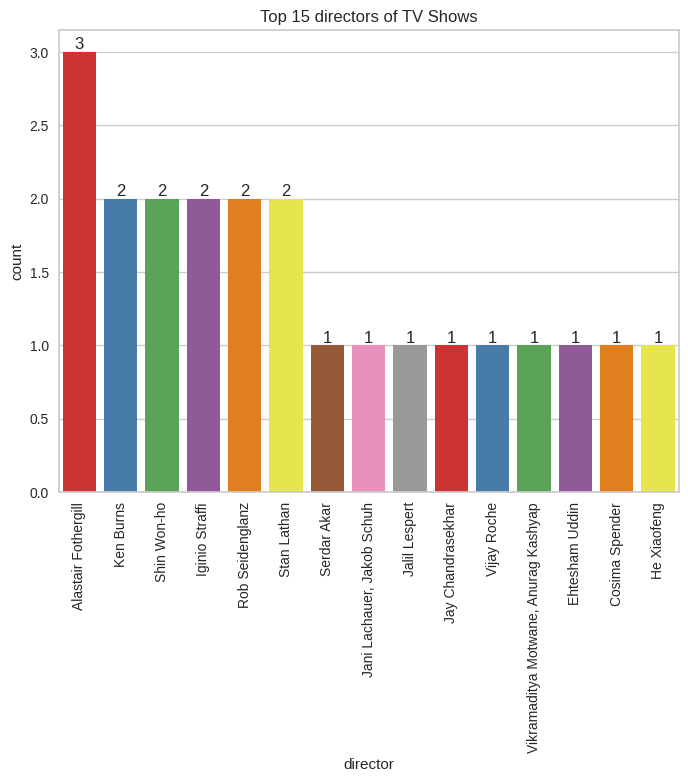

In [214]:
# let's find the top directors of the TV Shows.

tvdf = tvdf[tvdf['director'] != 'Director Unavailable']

# Set the size of plot
plt.figure(figsize=(8,6))

# Let's plot the count plot top 15 directors of TV Shows.
ax = sns.countplot(x=tvdf['director'], order=tvdf.director.value_counts().index[:15],palette='Set1')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 15 directors of TV Shows')

plt.show()

Alastair Fothergill is the director behind a significant portion of the TV shows accessible on Netflix for public viewing.

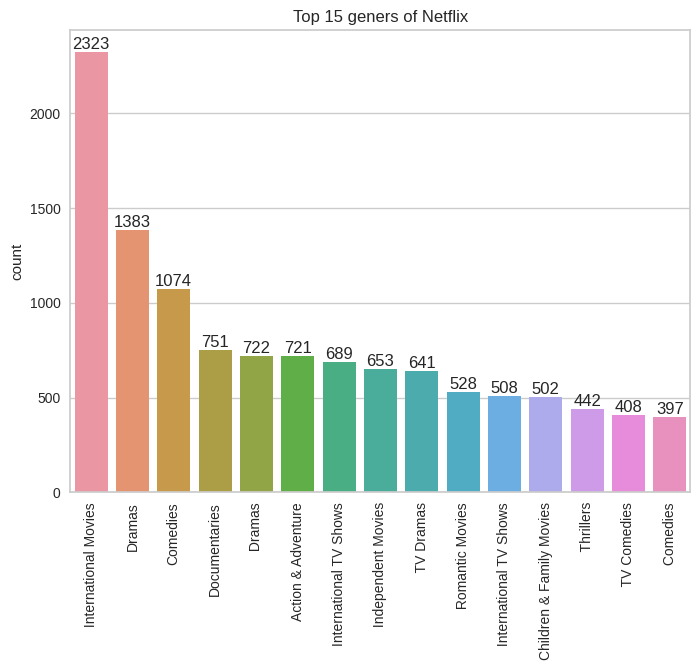

In [215]:
# Let's find the Most Popular Genres

# Creating a dataframe named as 'gndf'
gndf = nfdf.geners.str.split(',', expand=True).unstack()

# Set the size of plot
plt.figure(figsize=(8,6))

# Let's Plot the count plot for top most 15 geners.
ax = sns.countplot(x=gndf, order = gndf.value_counts().index[:15])

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 15 geners of Netflix')

plt.show()

Netflix offers international movies and ranks second in popularity for drama content.

In [216]:
# Let's install worldcloud.
!pip install wordcloud

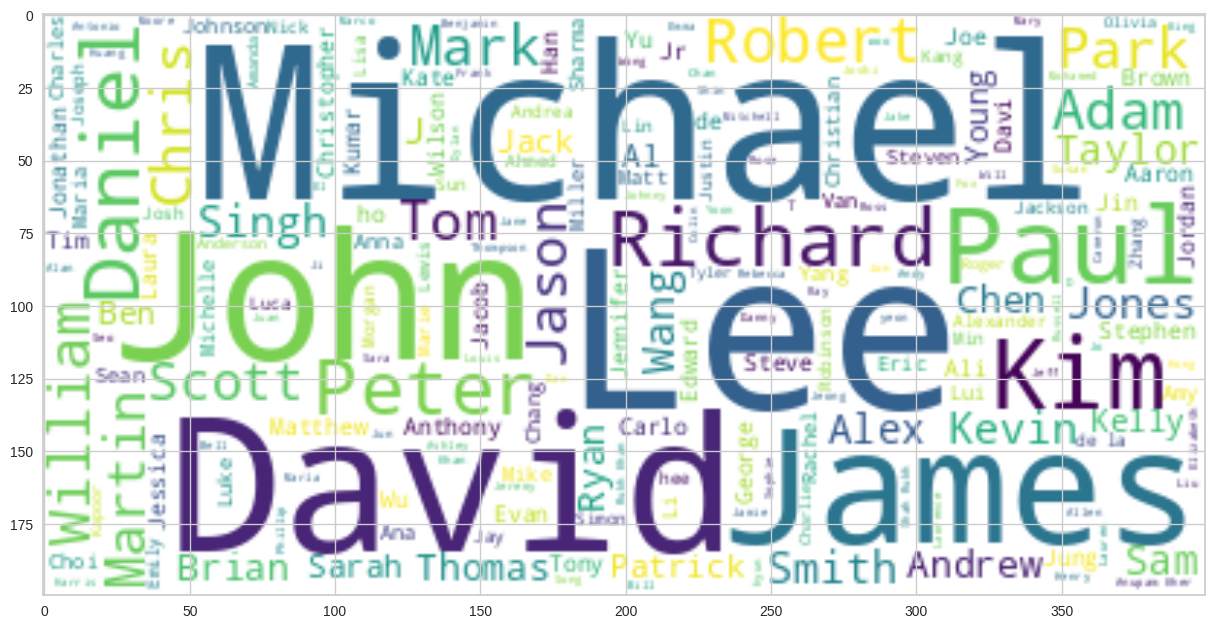

In [217]:
# Let's Print the Wordcloud for actors starred in movies and TV Shows of Netflix

# Let's import worldcloud
from wordcloud import WordCloud

# Set size of plot
plt.subplots(figsize=(15,10))

# Let's remove the fields where cast is not available.
csdf = nfdf[nfdf['cast'] != 'Cast Unavailable']

# Now generate a word cloud
cast_wordcloud = WordCloud(background_color ='white').generate(','.join(csdf.cast))

plt.imshow(cast_wordcloud, interpolation="bilinear")

plt.show()

Lee, Michel, David, Jhon, and James are the prominent actors featured in films and TV shows with the highest availability on Netflix.

**Observations :**

Netflix's content library is dominated by movies (69.14%) as compared to TV shows (30.86%).

The majority of movies accessible on Netflix originate from the United States, with India as the second-leading contributor.

For TV shows on Netflix, the United States and the United Kingdom stand out as the primary producers.

Directors Raul Campos and Jan Suter have helmed a significant portion of movies available on Netflix for public viewing.

Alastair Fothergill takes the lead in directing most of the TV shows available on Netflix for public consumption.

Netflix offers a diverse range of international movies and ranks second in hosting popular drama content.

Actors Lee, Michel, David, Jhon, and James have a notable presence in the films and TV shows that are most prevalent on Netflix.

**Let's do Multivariate Analysis**

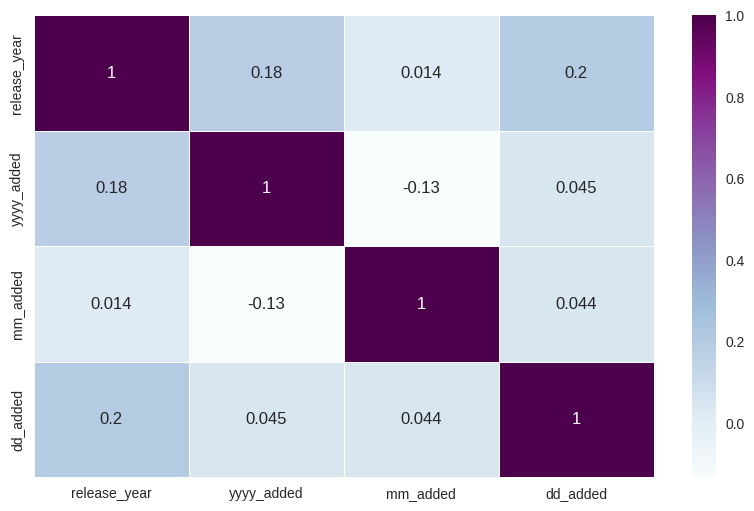

In [218]:
# Let's see the correlation with the help of heatmap
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(nfdf.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.40)
plt.show()

The 'release_year' and 'yyyy_added' variables exhibit a positive correlation of approximately 0.18. This suggests a modest positive relationship between the release year of the content and the year it was added to Netflix.

The 'release_year' and 'dd_added' variables demonstrate a positive correlation of around 0.20. This indicates a slight positive relationship between the release year of the content and the day it was added to Netflix.

The 'yyyy_added' and 'mm_added' variables show a negative correlation of roughly -0.13. This implies a weak negative relationship between the year content was added to Netflix and the month it was added.

The 'mm_added' and 'dd_added' variables display a small positive correlation of about 0.04. This indicates a limited positive relationship between the month content was added to Netflix and the day it was added.

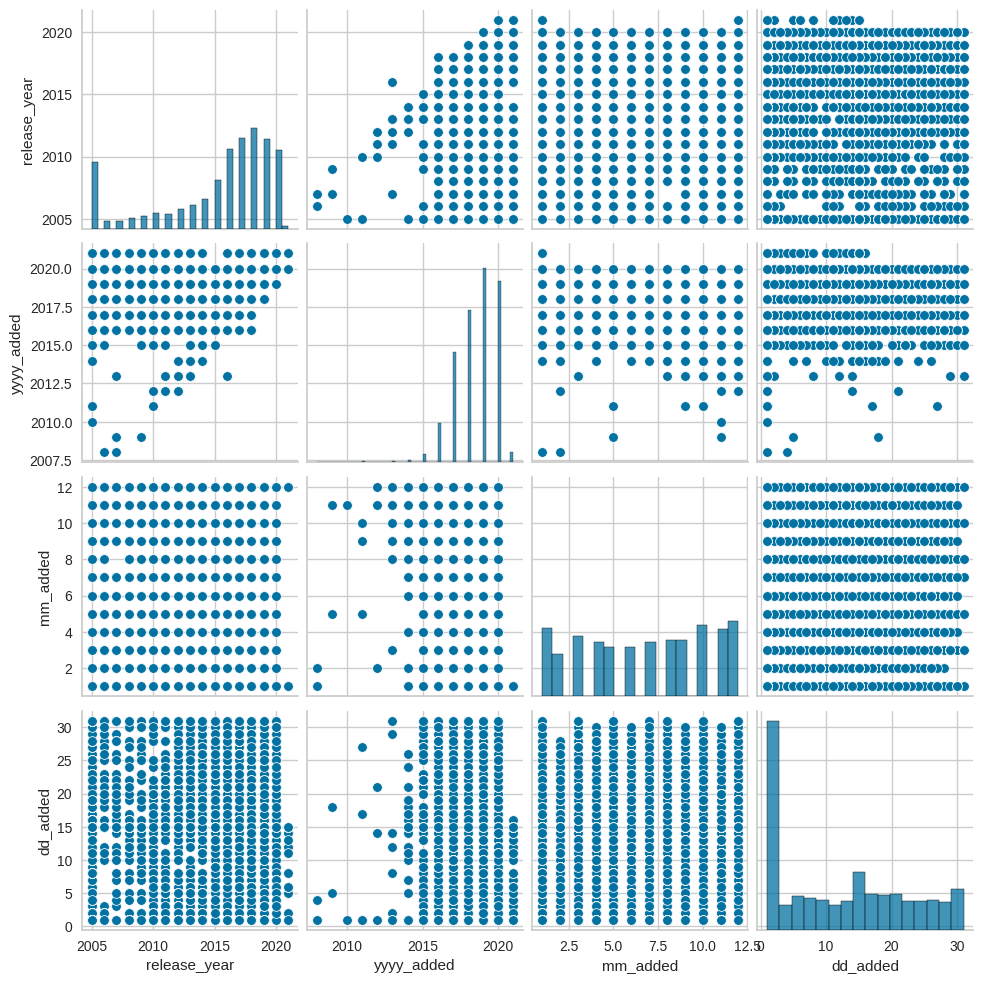

In [219]:
# Let's Plot Pair
sns.pairplot(nfdf)
plt.show()


From the graphical representation of 'release_year' and 'year_added,' it is evident that Netflix is progressively expanding its collection by introducing and releasing more movies and TV shows as time goes on.

Observing the plot of 'release_year' and 'month_added,' it can be inferred that Netflix distributes movies and TV shows consistently across all months of the year.

**Observations :**

A subtle correlation is visible between the release year of a movie or TV show and the day of the month it was added to Netflix.

By examining the relationship between 'release_year' and 'year_added' in the plot, it is apparent that Netflix is progressively augmenting its content by consistently introducing and launching more movies and TV shows over time.

The plot depicting 'release_year' and 'month_added' indicates that Netflix maintains a consistent distribution of movie and TV show releases across all months throughout the year.

**Let's do Data Pre-processing operatins**

**Textual Data Preprocessing**

In [220]:
# We requested the clustering of similar content by utilizing text-based attributes. Consequently, clustering is performed solely using the 'description' variable from the dataset.

# Let's Create a new variable having length of words of description variable
nfdf['des_len'] = nfdf['description'].apply(lambda x: len(x.split()))
nfdf.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22


**Now Expand Contraction**

Contractions, which involve shortening words or phrases by replacing letters with an apostrophe, are omitted to enhance text standardization. This process is crucial in maintaining the integrity of words within the context of Natural Language Processing (NLP).

In [221]:
# Let's Install contraction library
!pip install contractions

In [222]:
# Let's define a Function to expands contractions from the corpus

# For that import contractions library in environment
import contractions

def con_pro(corpus):
    '''Functions that would expand the contractions from corpus
    Args:
    corpus (string): corpus for which function has to be applied.
    Returns:
    corpus having expanded contractions
    '''
    cor = contractions.fix(corpus)
    return corpus

# Utilize the "contraction_process" function to apply it to every instance within the "description" variable.
nfdf['con_des'] = nfdf['description'].apply(con_pro)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...


With the aid of the Python "contractions" library, contractions within the corpus were effectively removed.

**LEt's remove Remove Stopwords and Punctuations**

In [223]:
# Import stopwords from nltk
from nltk.corpus import stopwords

In [224]:
# Let's Extract the English stopwords using nltk
stopwords_eng = stopwords.words('english')
# Now Display the English stopwords
np.array(stopwords_eng)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [225]:
len(stopwords_eng)

179

so, no. of english stopwords are 179.

In [226]:
# Now Import punctuations
import string
# Let's Extract punctuations
punc = string.punctuation
# Now Display punctuations
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [227]:
len(punc)

32

There are total 32 no. of puctuations.

In [228]:
## Now Create a new variable punctuation_% containing percentage of punctuations of each corpus

import string

def punc_ct(txt):
    ct = sum([1 for c in txt if c in punc])
    return 100*ct/len(txt)

# Let's Apply a function to contractions_description variable
nfdf['punc_%'] = nfdf['con_des'].apply(lambda x: punc_ct(x))
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282


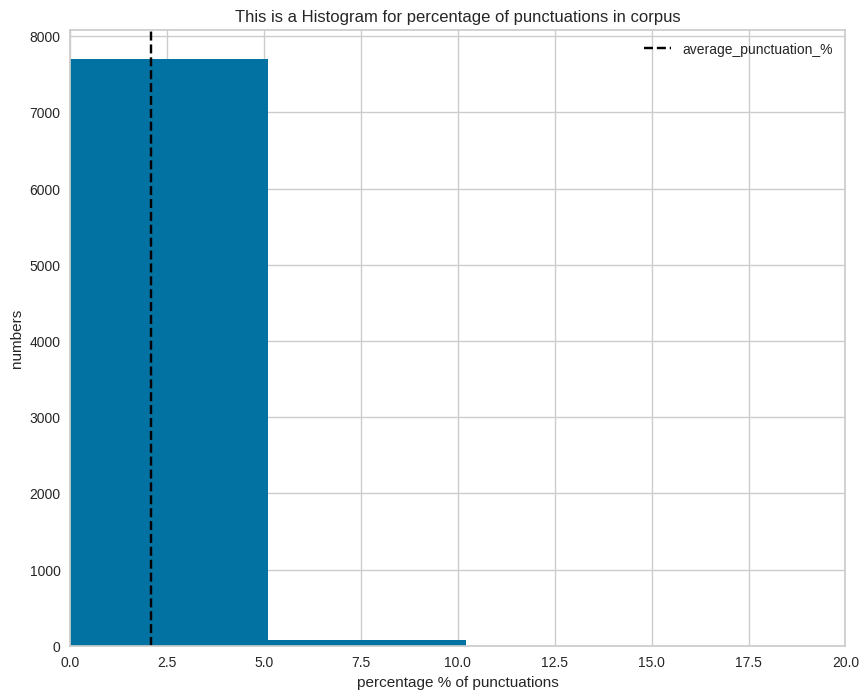

In [229]:
# Let's plot a Histogram for percentage of punctuations in contractions_description variable

# Set the size of plot
plt.figure(figsize=(10,8))
bins = np.linspace(0, 250, 50)

# Now Plot histogram
plt.hist(nfdf['punc_%'], bins)
plt.axvline(nfdf['punc_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Do Labeling to plot
plt.title('This is a Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage % of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

plt.show()

Most of the corpus comprises punctuation, constituting less than 5% of the entire content.

In [230]:
# Create a function that performs the following operations on the corpus: removing stopwords and punctuation, and converting the text to lowercase.


def remove_stopwords_punc(corpus):
    '''Develop a function that applies three actions to the corpus- removing stopwords and punctuation, and converting the text to lowercase.
    Args:
    The provided function is to be applied to the given text corpus (string).
    Returns:
    Create a transformed corpus by converting it to lowercase and removing both stopwords and punctuation.
    '''
    punc = "your_list_of_punctuation_characters_here"  # Define your list of punctuation characters
    stopwords = ["your", "list", "of", "stopwords", "here"]  # Define your list of stopwords

    no_punc = [char for char in corpus if char not in punc]
    no_punc = ''.join(no_punc)
    return ' '.join([word.lower() for word in no_punc.split() if word.lower() not in stopwords])

# Utilize the "remove_stopwords_punc" function to process every occurrence within the variable "contractions_description."
nfdf['no_sw_pun_des'] = nfdf['con_des'].apply(remove_stopwords_punc)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d ."


The "remove_stopwords_punctuations" function effectively transformed the corpus to lowercase, while also eliminating stopwords and punctuation.

**Let's Remove URL(s)**

In [231]:
# Let's define a Function to removes URL(s) from corpus

# So, for that let's Import regex

import re

def re_URL(corpus):
    '''
    If present, this function removes URL addresses from a given corpus.
    Args:
        The function is designed to be applied to a string corpus.
    Returns:
        The resulting string is cleansed of any URL addresses.
    '''
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Utilize the "remove_URL" function to process each instance within the "no_sw_pun_description" variable.
nfdf['cl_des'] = nfdf['no_sw_pun_des'].apply(re_URL)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


Every corpus within the "no_sw_pun_description" variable has been purged of all URLs.

**Let's Remove Emails**

In [232]:
## Function for removing email addresses from a text corpus.

def re_emails(corpus):
    '''
    It eliminates any email addresses from the given corpus, should they exist.
    Args:
        Input parameter "corpus" (string): The string on which the function is intended to be used.
    Returns:
        String devoid of email addresses after cleaning.
    '''
    cp_split = corpus.split()
    return ' '.join([i for i in cp_split if '@' not in i])

# Utilize the "remove_emails" function on every instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_emails)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


If present, the "remove_emails" function is employed to eliminate any email addresses from the corpus.

**Let's Remove HTML-Tags**

In [233]:
# Function for removing HTML tags from a text corpus.

# Include the BeautifulSoup library.
from bs4 import BeautifulSoup

def re_html_tags(corpus):
    '''
    Eliminates HTML tags from a corpus, if they exist.
    Args:
        Input parameter "text" (string): The corpus to which the function is intended to be applied.
    Returns:
        Corpus cleaned of HTML tags.
    '''
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Utilize the "remove_html_tags" function on every instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_html_tags)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


**Let's Remove Special Characters**

In [234]:
# Function for removing special characters.

# Include the regex library.

import re

def re_sp_char(corpus):
    """Eliminate any special characters from the corpus, if they exist.
    args:
    Input parameter "corpus" (string): The corpus to which a function is intended to be applied.
    return:
    Corpus cleaned of any special characters.
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Utilize the "remove_special_char" function on each instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_sp_char)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j 3 vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d


The corpus has been effectively cleared of special characters.


**Let's Remove Words and Digits Contain Digits**

In [235]:
# Let's defina a Function to eliminate digits from a corpus

# LEt's include regex library in environment
import re

def re_digits(corpus):
    '''
    Eliminates digits from a corpus, should they be present.
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        String devoid of any digits after cleaning.
    '''
    return re.sub('\w*\d\w*','',corpus)

# Utilize the "remove_digits" function on each instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_digits)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d


The "remove_digits" function has proficiently eliminated digits from the corpus.

**Let's Remove Whitespaces**

In [236]:
# Let's define a Function to eliminate extra whitespaces from a corpus

# Add regex library
import re

def re_extra_wh_spaces(corpus):
    '''
    Eliminates additional whitespaces from a corpus, should they exist.
    Args:
        Input parameter "text" (string): The corpus to which the function is intended to be applied.
    Returns:
        String cleaned of any excess whitespaces.
    '''
    return re.sub(r'^\s*|\s\s*', ' ', corpus).strip()

# Utilize the "remove_extra_whitespaces" function on each instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_extra_wh_spaces)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d


Any additional whitespaces that were generated during the text processing have been effectively eliminated.

**Deal with Tokenization**

In [237]:
# Define a Function to tokenize the corpus

# Import required dependancy
import nltk
nltk.download('punkt')

def tok_fun(corpus):
    '''
    Function to tokenize a corpus.
    Args:
        Input parameter "corpus" (string): The corpus to which the function is intended to be applied.
    Returns:
        Corpus after tokenization.
    '''
    return nltk.word_tokenize(corpus)

# Utilize the "tokenization_fun" function on each instance within the variable "clean_description".
nfdf['tok_des'] = nfdf['cl_des'].apply(tok_fun)
nfdf.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des,tok_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q,"[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v,"[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m,"[w, m, d, dd, w, d, d, g, g, jg, d, g, m]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g,"[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk,"[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,..."


Every instance from the "clean_description" variable has been successfully tokenized.

**Deal with Text Normalization**

Stemming is a process that reduces words to their root stems. For instance, "run," "running," "runs," and "runed" are all derived from the same word, "run." Stemming involves removing prefixes or suffixes like "ing," "s," "es," etc. The NLTK library offers tools for stemming words, including various algorithms like the Porter stemmer and Snowball stemmer. Although Porter stemmer is commonly used, it's worth noting that stemming might not be ideal for production scenarios as it can often lead to removing essential parts of words.

To address these limitations, lemmatization emerged as an alternative technique. Unlike stemming, which focuses on stripping words down to their roots, lemmatization aims to transform words to their base or dictionary form. In the context of text normalization, lemmatization is preferred over stemming due to its accuracy and context-awareness.

While a raw function utilizing the Porter Stemmer can be written, in this context, we will solely rely on lemmatization for text normalization, rendering the stemming function unnecessary.

In [238]:
# Function for conducting stemming operations on a corpus.

# Import necessary lirary
from nltk.stem.porter import PorterStemmer

# Now Create a object for stemming
por_ste = PorterStemmer()

# Let's create a function for stemming
def ste(tok_text):
    '''Function that applies stemming to each word in a token.'''
    tx = [por_ste.stem(word) for word in tok_text]
    return tx

We've created a basic function that utilizes the Porter Stemmer to stem words. However, it's important to note that we'll exclusively employ lemmatization for text normalization, rendering the stemming function unnecessary for execution.

**Lemmatization**

Lemmatization shares similarities with stemming, but it introduces contextual understanding to words. While both lemmatization and stemming aim to reduce words to their root forms, they differ in their approach. Lemmatization is a structured process that involves matching words against a language dictionary to transform them into their lemmas. Unlike stemming, lemmatization selectively applies to words based on their presence in the language dictionary, ensuring only necessary transformations take place.

In [239]:
# Function for conducting lemmatization operations on a corpus.

# Import required lirary
import nltk
from nltk.stem import WordNetLemmatizer

# Download all nltk corpuses
nltk.download('wordnet')
nltk.download('omw-1.4')

# Now Create a object for lemmatization
lem = WordNetLemmatizer()

# Let's Create a function for lemmatization
def lemtz(tok_text):
    '''Function that applies lemmatization to each word within a token.'''
    tx = [lem.lemmatize(word, pos="v") for word in tok_text]
    return tx

# Utilize the lemmatization function on each instance within the variable "tokenized_description".
nfdf['lem_des'] = nfdf['tok_des'].apply(lambda x : lemtz(x))
nfdf.head(6)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des,tok_des,lem_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q,"[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]","[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v,"[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ...","[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m,"[w, m, d, dd, w, d, d, g, g, jg, d, g, m]","[w, m, d, dd, w, d, d, g, g, jg, d, g, m]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g,"[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j...","[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk,"[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,...","[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,..."
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d,"[a, g, xm, w, m, m, bd, md, d, m, b, k, kg, d]","[a, g, xm, w, m, m, bd, md, d, m, b, k, kg, d]"


Each tokenized corpus has been successfully lemmatized.

**Let's Join all words back together after Text Normalization**

After normalizing, there's no need to maintain the words in a tokenized form. Instead, you should reassemble them to create a single string in each row.

##### 1. Why did you pick the specific chart?

In [240]:
# Generate a new feature that consolidates all words into a single string within each row.
nfdf['fi_des'] = nfdf['lem_des'].apply(lambda x: ' '.join(x))
nfdf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des,tok_des,lem_des,fi_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q,"[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]","[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]",i w b d d m wdd m g j vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v,"[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ...","[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ...",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m,"[w, m, d, dd, w, d, d, g, g, jg, d, g, m]","[w, m, d, dd, w, d, d, g, g, jg, d, g, m]",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g,"[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j...","[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j...",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk,"[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,...","[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,...",a b g d bm d g x w wdg m l vg b g bkjk


In [241]:
# Generate a novel feature that comprises the word lengths of the "final_description" variable after rejoining them into a string.
nfdf['fi_des_len'] = nfdf['fi_des'].apply(lambda x: len(x.split()))
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,...,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des,tok_des,lem_des,fi_des,fi_des_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q,"[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]","[i, w, b, d, d, m, wdd, m, g, j, vd, m, q]",i w b d d m wdd m g j vd m q,13
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v,"[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ...","[a, dvg, qk, mx, c, d, vv, m, wk, w, b, d, w, ...",a dvg qk mx c d vv m wk w b d w g d v,16
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies",...,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m,"[w, m, d, dd, w, d, d, g, g, jg, d, g, m]","[w, m, d, dd, w, d, d, g, g, jg, d, g, m]",w m d dd w d d g g jg d g m,13
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g,"[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j...","[i, wd, g, d, b, d, m, dg, m, xm, m, bv, wm, j...",i wd g d b d m dg m xm m bv wm j g,15
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,...,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk,"[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,...","[a, b, g, d, bm, d, g, x, w, wdg, m, l, vg, b,...",a b g d bm d g x w wdg m l vg b g bkjk,16
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",...,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d,"[a, g, xm, w, m, m, bd, md, d, m, b, k, kg, d]","[a, g, xm, w, m, m, bd, md, d, m, b, k, kg, d]",a g xm w m m bd md d m b k kg d,14


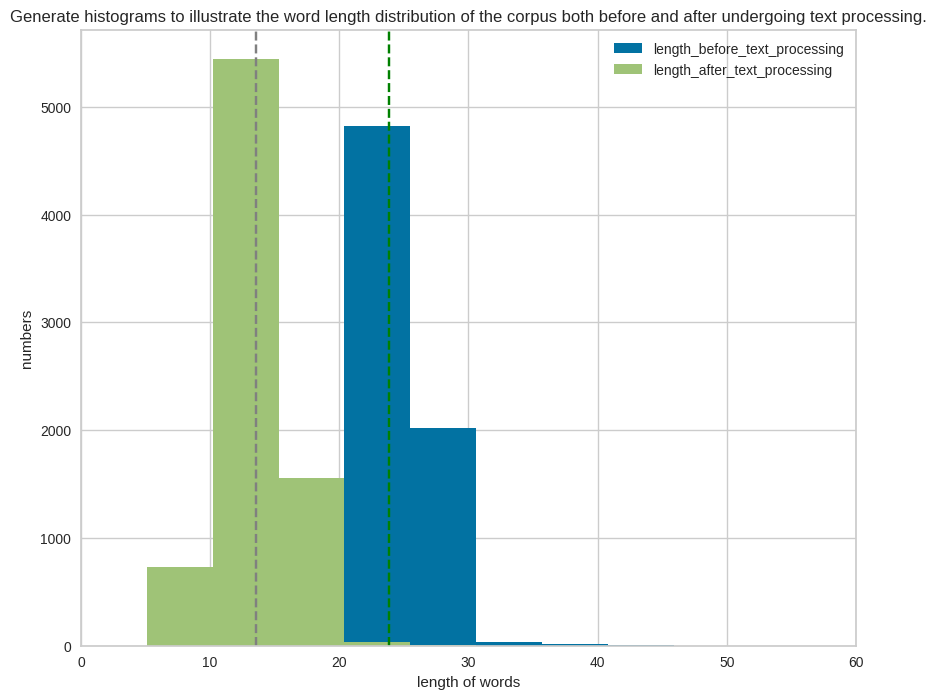

In [242]:
# Construct histograms to visualize the distribution of word lengths before and after text processing.

# Set figure size
plt.figure(figsize=(10,8))
bins = np.linspace(0, 250, 50)

# let's Plot histograms
plt.hist(nfdf['des_len'], bins, label='length_before_text_processing')
plt.hist(nfdf['fi_des_len'], bins, label='length_after_text_processing')

# Let's Plot vertically mean
plt.axvline(nfdf['des_len'].mean(), color='green', linestyle='dashed')
plt.axvline(nfdf['fi_des_len'].mean(), color='gray', linestyle='dashed')

# Do Labeling plot
plt.title('Generate histograms to illustrate the word length distribution of the corpus both before and after undergoing text processing.')
plt.xlabel('length of words')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,60)

# Now Display the plot
plt.show()

Post text processing, each corpus has an average of 14 words, whereas prior to text processing, each corpus contains an average of 24 words.

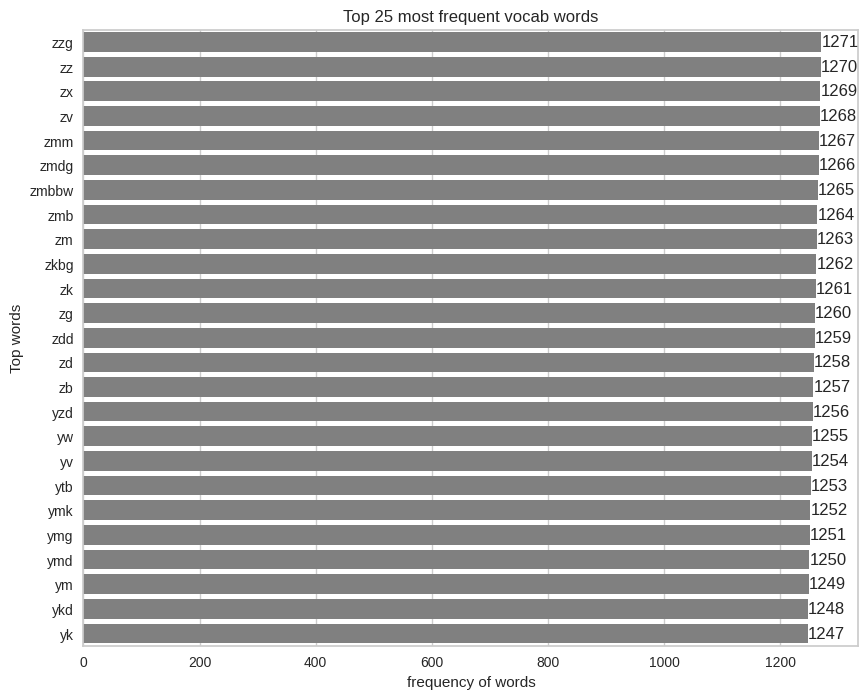

In [243]:
# Top words ones cleaning of text

# Let's Collect vocabulary count

# Now Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Let's Create a object of tfid vectorizer
tfid_vec = TfidfVectorizer()

# Train the vectorizer using the textual data.
X = tfid_vec.fit(nfdf['fi_des'])

# Gather the vocabulary terms employed by the vectorizer.
dic = X.vocabulary_.items()

# Generate a bar plot showcasing the most frequent words following text cleaning.

# Arrays for storing the vocabulary and corresponding word counts.
vc = []     # vc for vocab
cn = []     # cn for count

# Iterate over each vocabulary item and its count, and add the count value to the respective designated lists.
for key, value in dic:
    vc.append(key)
    cn.append(value)

# Store the counts in a Pandas dataframe with the vocabulary as the index.
vc_cn_df = pd.Series(cn, index=vc)

# Now Sort the dataframe
vc_cn_df = vc_cn_df.sort_values(ascending=False)

# Take Top 25 vocab
top_vc = vc_cn_df.head(25)

# Plot of the top 25 vocabulary words
plt.figure(figsize=(10,8))
ax = sns.barplot(y = top_vc.index, x = top_vc.values, color='gray')
ax.set_title('Top 25 most frequent vocab words')
ax.set_xlabel('frequency of words')
ax.set_ylabel('Top words')
ax.bar_label(ax.containers[0])
plt.show()

zzg, zz, zx, zv, zmm these are the top 5 most frequent words in the corpus.

**Let's do Text Vectorization**

In [244]:
# Let's do Vetorization

# Find the tfid representation matrix of the text data

# Import TfidfVectorizer package
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a object for tfid vectorizer
vect = TfidfVectorizer()

# Let's Fit the vectorizer using the textual data
X_tfidf = vect.fit_transform(nfdf['fi_des'])

In [245]:
# Grab the tfid matrix in numpy array form
X_ar = X_tfidf.toarray()
X_ar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [246]:
# Let's see the Shape of above array
X_ar.shape

(7770, 1272)

The array comprises 7770 observations and 16261 features.

You could opt for dimension reduction using PCA or employ the parameter "max_features={value}" in the TFIDFvector object for the same purpose.

However, if you choose to implement PCA, you will need to perform text vectorization anew on the data generated post PCA.

In [247]:
# Save the TF-IDF array in a Pandas dataframe.
ds = pd.DataFrame(X_ar, columns = vect.get_feature_names_out())
ds.head(6)

,ab,abb,abd,abdd,abdm,abdmm,abg,abj,abm,ad,...,zkbg,zm,zmb,zmbbw,zmdg,zmm,zv,zx,zz,zzg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This represents our final dataset following all text processing steps.

In [248]:
# Let's define the input data for models
X = ds.values

In [249]:
# Let's take a snap of dataset
X[0:6]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Let's see the ML Model Implementation**

In [293]:
# Function to assess and visually represent the model's evaluation metrics.

# Import required dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Let's define a function
def evl_cl_md(model, X , Y_predict):
    """
    Assess a clustering model and display the results.

    Parameters:
    model (object): It is a clustering model object.
    X (array): The input data for model.
    Y_predict: Prediction made by model.

    Returns:
    Model evaluation result is given as:
    """

    # Calculate evaluation metrix performance
    print('~*'*40)
    print('Evaluation result are as below: :\n')
    # silhouette_score
    sil_score = silhouette_score(X, Y_predict)
    mnk= silhouette_score(X, Y_predict)
    ch_score = calinski_harabasz_score(X, Y_predict)
    db_score = davies_bouldin_score(X, Y_predict)

    # Now Print the results of above
    print(f"Number of clusters are: {len(set(Y_predict))}")
    print(f"Silhouette score is: {sil_score}")
    print(f"Calinski-Harabasz score is: {ch_score}")
    print(f"Davies-Bouldin score is: {db_score}")
    print('*~'*40)

    # Data baking
    met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    K_met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    evl_result = [sil_score, ch_score, db_score]
    K_evl_result = [sil_score, ch_score, db_score]

    # Let's Create a evaluation dataframe
    evl_df = pd.DataFrame({'Evl Metrics': met,
                   'Result': evl_result})

    # Now Print the dataframe
    print(tabulate(evl_df, headers='keys', tablefmt='grid'))
    print('\n', '~*'*40, '\n')

    # Let's make a plot
    # Now Create silhouette visualizer
    vis = SilhouetteVisualizer(model)
    vis.fit(X)
    vis.poof()
    print('~*'*40)

    plt.figure(figsize=(10,8))
    ax = sns.barplot(x = evl_df['Evl Metrics'], y = evl_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing Evaluation Metrics performance")
    ax.set_xlabel("Evaluation Metrics")
    ax.set_ylabel("Score of evaluation matrix")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~*'*40)

    return {'Num_clusters':len(set(Y_predict)),'y_predict':Y_predict, 'silhouette':sil_score, 'ch_score':ch_score, 'db_score':db_score}


In [251]:
# Let's define a Function to visualise clusters

def vis_clu(X, Y_predict):
    # X is a 2D array of data points
    # y_predict is a one-dimensional array containing integer labels that indicate the cluster assignment for each data point.

    # Generate a scatter plot of the data points, employing colors based on their respective cluster labels.
    plt.scatter(X[:, 0], X[:, 1], c=Y_predict, cmap='rainbow')

    # Show the plot
    plt.show()

**Implement K-Means Clustering by Elbow method**

Let's Find the optimal number of clusters using the elbow method

In [252]:
# Let's call yellowbrick library in our environment
!pip install yellowbrick

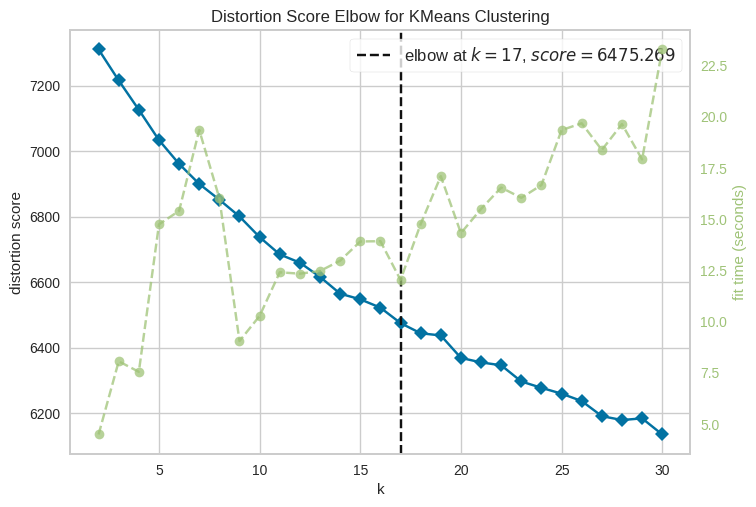

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [253]:
# Determining the Ideal Number of Clusters using the Elbow Method

# Import the KMeans algorithm and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Create an instance of the clustering model and the visualizer.

K_model = KMeans(random_state=42)
elb_vis = kelbow_visualizer(K_model, X, k=(2,31), locate_elbow=True)

# Display the figure
elb_vis.show()


In [254]:
# Let's find the optimal number of cluster
el_op_K = elb_vis.elbow_value_
print(f'The optimal number of clusters by Elbow method : {el_op_K}')

The optimal number of clusters by Elbow method : 17


**LEt's see Silhouette Score Method**


Discovering the optimal number of clusters using the silhouette score method.

In [255]:
# Determining the ideal number of clusters using the Silhouette Score Method.

# Import the KMeans algorithm and the silhouette_score metric.
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

No_of_clu = range(2,31)

for i in No_of_clu:
    clu = KMeans(n_clusters=i)
    preds = clu.fit_predict(X)
    ct = clu.cluster_centers_
    score = silhouette_score(X, preds)
    print(f"When number of clusters are {i}, then silhouette score is {score}")

When number of clusters are 2, then silhouette score is 0.012218734936017642
When number of clusters are 3, then silhouette score is 0.018013760513994947
When number of clusters are 4, then silhouette score is 0.02156025562176447
When number of clusters are 5, then silhouette score is 0.025504101497016523
When number of clusters are 6, then silhouette score is 0.02727244504761769
When number of clusters are 7, then silhouette score is 0.030363074536745326
When number of clusters are 8, then silhouette score is 0.03028958457907521
When number of clusters are 9, then silhouette score is 0.03282311650417588
When number of clusters are 10, then silhouette score is 0.03466485920442667
When number of clusters are 11, then silhouette score is 0.03607620350694822
When number of clusters are 12, then silhouette score is 0.034434737282685327
When number of clusters are 13, then silhouette score is 0.037974723626547524
When number of clusters are 14, then silhouette score is 0.035570320455571354


So, we have found the optimal number of clusters by Silhouette Score Method is 30.

**According to the elbow method, the optimal cluster count is 17, while the silhouette score method suggests an optimal count of 30. However, we've opted to proceed with 17 clusters as determined by the elbow method for constructing the model.**

In [256]:
# Training the K-means model on a dataset with a specified cluster count of 17.

# Import required dependancy
from sklearn.cluster import KMeans

# Now Fit the model
kmod = KMeans(n_clusters=17, init='k-means++', random_state= 42)
kmod.fit(X)

KMeans(n_clusters=17, random_state=42)

In [257]:
# Let's see the Centers of the clusters of the model
k_centers = kmod.cluster_centers_
k_centers

array([[ 3.03576608e-18,  2.08612594e-03, -7.58941521e-19, ...,
         2.09572012e-03, -5.85469173e-18,  5.96311195e-19],
       [ 3.77434415e-03,  3.37358999e-04,  5.17818706e-04, ...,
        -1.08420217e-18,  2.71273314e-03,  5.34679501e-04],
       [ 1.30104261e-17,  1.36032435e-03,  1.24463046e-03, ...,
         5.42101086e-20, -9.10729825e-18, -4.06575815e-19],
       ...,
       [ 7.80625564e-18,  0.00000000e+00,  1.54788916e-03, ...,
        -1.89735380e-19, -7.37257477e-18,  1.62630326e-19],
       [ 7.80625564e-18,  1.77113069e-03, -9.75781955e-19, ...,
        -2.71050543e-19,  2.43611095e-03,  2.16840434e-19],
       [ 4.33680869e-18,  0.00000000e+00, -7.58941521e-19, ...,
        -2.16840434e-19,  4.60827723e-03,  2.98155597e-19]])

In [258]:
# Let's find the Inertia of the model
k_inertia = kmod.inertia_
k_inertia

6475.269483497903

In [259]:
# Result Prediction
Y_predict = kmod.predict(X)
Y_predict

array([ 1,  0, 14, ...,  7,  0,  2], dtype=int32)

~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
Evaluation result are as below: :

Number of clusters are: 17
Silhouette score is: 0.03988023337166046
Calinski-Harabasz score is: 71.6955698399344
Davies-Bouldin score is: 4.382713024474413
*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
+----+-------------------------+------------+
|    | Evl Metrics             |     Result |
+====+=========================+============+
|  0 | Silhouette score        |  0.0398802 |
+----+-------------------------+------------+
|  1 | Calinski-Harabasz score | 71.6956    |
+----+-------------------------+------------+
|  2 | Davies-Bouldin score    |  4.38271   |
+----+-------------------------+------------+

 ~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~* 



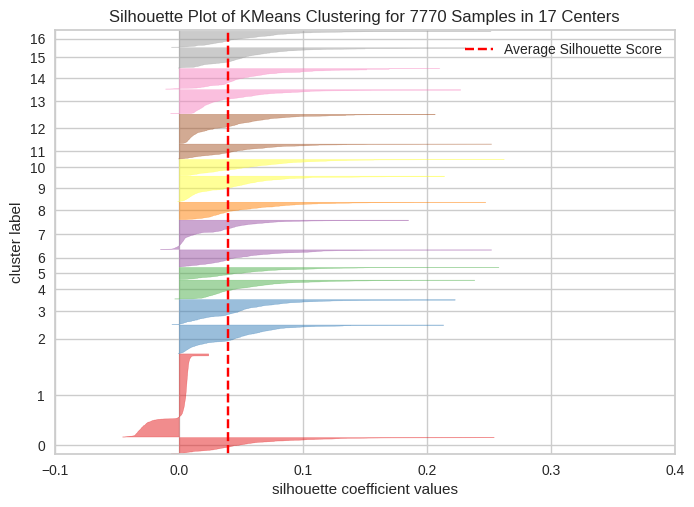

~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*


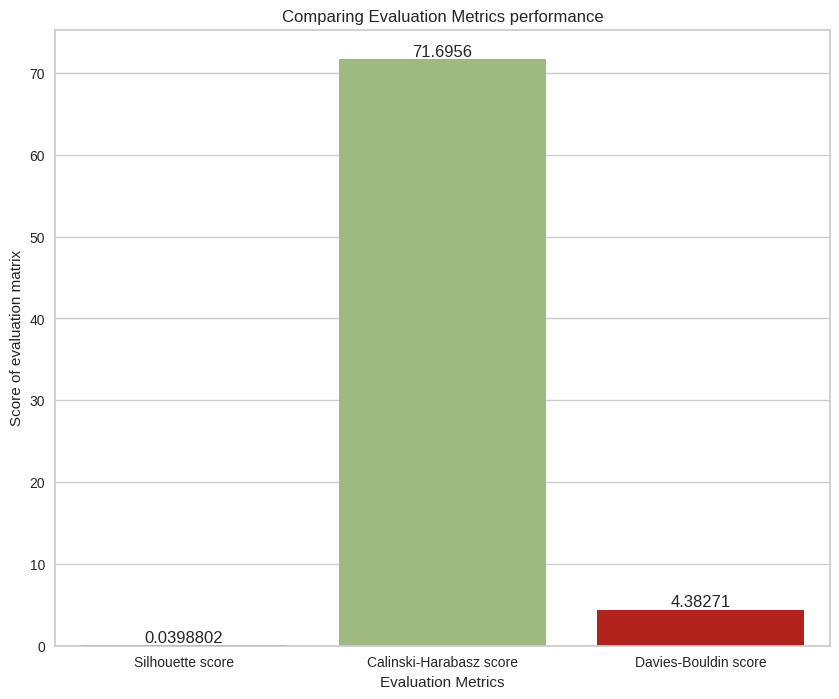

~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*


In [260]:
# Let's Model Evaluation
K_eval = evl_cl_md(kmod, X, Y_predict)

Based on these metrics results, we can say:

Silhouette Score: The silhouette score is relatively low, suggesting that the clusters might not be well-separated or distinct.

Calinski-Harabasz Score: The Calinski-Harabasz score is moderately high, indicating good inter-cluster variance and compactness.

Davies-Bouldin Score: The Davies-Bouldin score is relatively high, implying that the clusters might not be well-separated.

So, the low silhouette score and high Davies-Bouldin score could indicate that the clusters are not well-defined or separated, possibly pointing towards an inherent complexity in the data's structure. The Calinski-Harabasz score suggests that there is some level of cluster compactness. It might be worthwhile to explore other cluster counts or clustering algorithms to potentially improve the model's performance.

In [261]:
# Assign movies and TV shows to their respective clusters.

# Copy the dataset
kmod_df = nfdf.copy()

# Removing non-original features from the dataset.

kmod_df.drop(columns={'des_len','con_des', 'punc_%', 'no_sw_pun_des',
                        'cl_des', 'tok_des', 'lem_des',
                        'fi_des', 'fi_des_len'}, axis=1, inplace=True)

# Allocate movies and TV shows to their corresponding clusters.
kmod_df['cluster'] = kmod.labels_
kmod_df.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,14
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,9
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,2


Text(0, 0.5, 'Number of Movies / TV Shows')

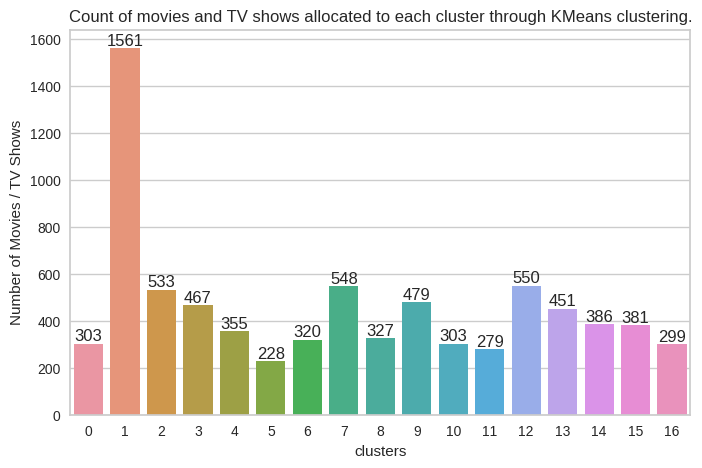

In [262]:
# Determining the count of movies and TV shows in each cluster.

# Generate a dataframe displaying the count of movies and TV shows in each cluster.
num_datapoint_in_clu = kmod_df['cluster'].value_counts().reset_index()

# Let's Plot the bar plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=num_datapoint_in_clu['index'], y=num_datapoint_in_clu['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Count of movies and TV shows allocated to each cluster through KMeans clustering.")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows")

The highest count of movies and TV shows is observed in Cluster 12, followed by Clusters 7 and 15.

**let's do Hierarchical Clustering**

Determining the ideal number of clusters using hierarchical clustering and the dendrogram.

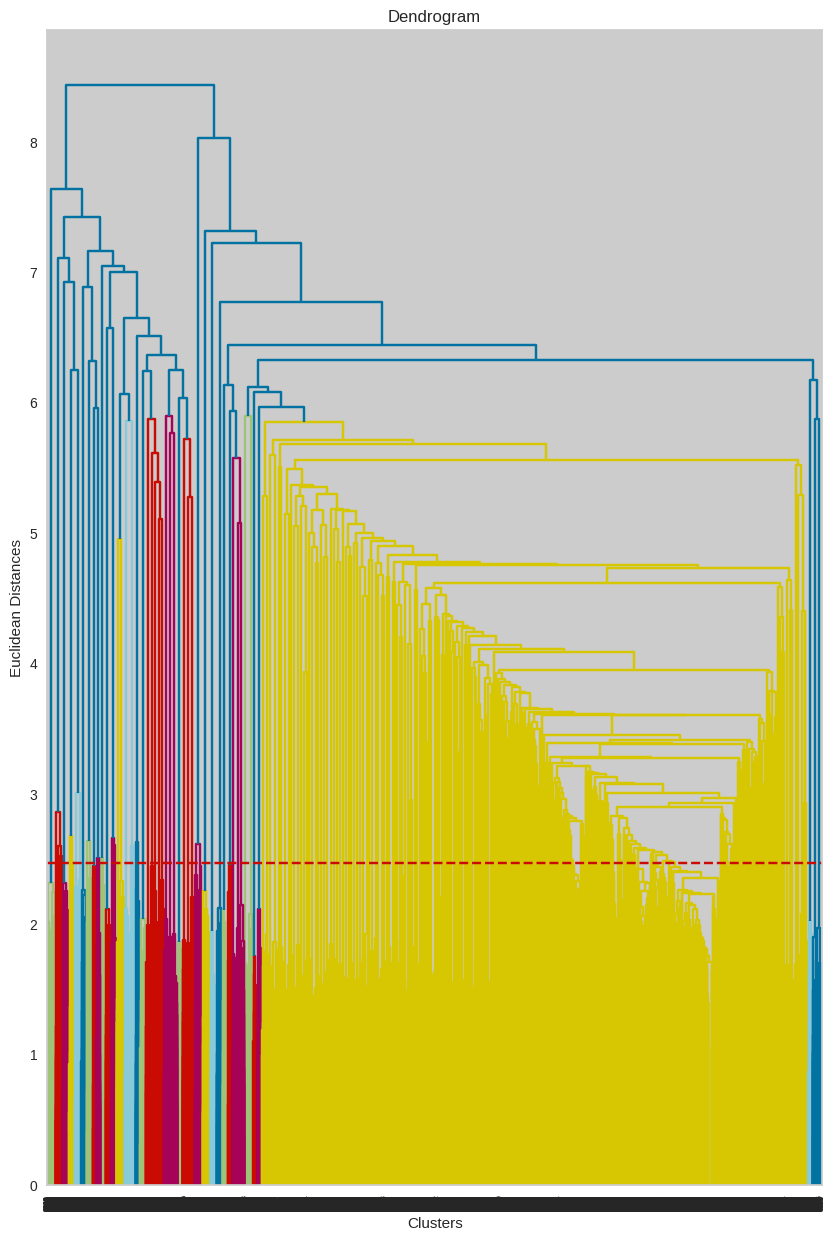

In [263]:
# Utilizing the dendrogram to identify the optimal number of clusters.

# Import necessary dependNCIES
import scipy.cluster.hierarchy as sch

# Plot the dendogram
plt.figure(figsize=(10,15))
den = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=2.47, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distances')
plt.show()

By bisecting the tallest vertical line horizontally, we intersect 19 vertical lines, leading to the identification of the optimal cluster count: 19.

**Silhouette Score Method**

Determining the best number of clusters using the silhouette score approach.

We attempted to determine the optimal number of clusters using the silhouette score method in pure Python code, but due to extended computational time, we opted to forego it. Instead, we relied on the optimal cluster count of 19 obtained through the dendrogram method for our modeling. Therefore, the selected number of clusters for constructing the model is 19, as identified via the dendrogram method.

In [264]:
# Fitting the hierarchical clustering model to the dataset with a specified cluster count of 19.

# Import necessary dependancy
from sklearn.cluster import AgglomerativeClustering

# Let's Fit model
hie_clu_mod = AgglomerativeClustering(n_clusters = 19, affinity = 'euclidean', linkage = 'ward', compute_distances=True)
hie_clu_mod.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_distances=True,
                        n_clusters=19)

In [265]:
# Make R Prediction
Y_predict = hie_clu_mod.labels_
Y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [288]:
# Assessment of the hierarchical clustering model's performance.

# A function to assess and visually present the evaluation metrics of the hierarchical clustering model.

# Import required libraries
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Define a evaluatiion model for hierarchical clustering
def hie_clu_eva(model, X , Y_predict):
    """
    Assess a clustering model and display the outcomes.

    Parameters:
    model (object): The clustering model object.
    X (array): A input data.
    Y_predict: Prediction drawn on model.

    Returns:
    Model evaluation result are as below:
    """

    # Calculate evaluation metrics
    print('~*'*40)
    print('Evaluation results are :\n')
    sil_score = silhouette_score(X, Y_predict)
    mnk = silhouette_score(X, Y_predict)
    ch_score = calinski_harabasz_score(X, Y_predict)
    db_score = davies_bouldin_score(X, Y_predict)

    # Print the evaluation results
    print(f"Number of clusters are : {len(set(Y_predict))}")
    print(f"Silhouette score is: {sil_score}")
    print(f"Calinski-Harabasz score is : {ch_score}")
    print(f"Davies-Bouldin score is: {db_score}")
    print('~*'*45)

    # Data
    met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    evl_result = [sil_score, ch_score, db_score]

    hc_met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    hc_evl_result = [sil_score, ch_score, db_score]


    # Let's Create a dataframe
    evl_df = pd.DataFrame({'Evaluation Metrics': met,
                   'Result': evl_result})
    # Print the dataframe
    print(tabulate(evl_df, headers='keys', tablefmt='grid'))
    print('\n', '~*'*40, '\n')

    plt.figure(figsize=(8,6))
    ax = sns.barplot(x= evl_df['Evaluation Metrics'], y= evl_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing the Evaluation Metrics")
    ax.set_xlabel("Name of Evaluation Metrics")
    ax.set_ylabel("Score of evaluation matrix")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~*'*40)

    return {'Num_clusters':len(set(Y_predict)),'silhouette':sil_score, 'ch_score':ch_score, 'db_score':db_score}


~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
Evaluation results are :



Number of clusters are : 50
Silhouette score is: -0.25252490311097375
Calinski-Harabasz score is : 5.985688116711106
Davies-Bouldin score is: 1.1694072247867717
~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
+----+-------------------------+-----------+
|    | Evaluation Metrics      |    Result |
+====+=========================+===========+
|  0 | Silhouette score        | -0.252525 |
+----+-------------------------+-----------+
|  1 | Calinski-Harabasz score |  5.98569  |
+----+-------------------------+-----------+
|  2 | Davies-Bouldin score    |  1.16941  |
+----+-------------------------+-----------+

 ~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~* 



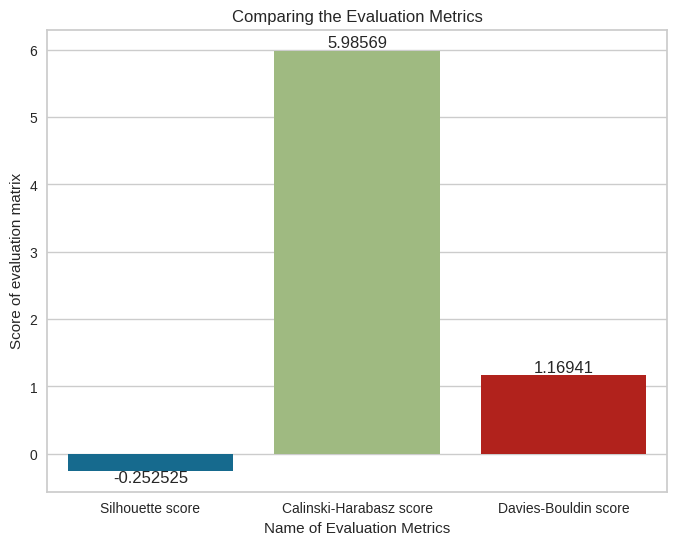

~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*


In [313]:
# See the Evaluation of Model
cc = hie_clu_eva(hie_clu_mod, X, Y_predict)

Based on the rresults of evaluation metrics:

Silhouette Score: The silhouette score is negative, indicating that the clusters are overlapping and not well-separated. A negative silhouette score is generally undesirable, as it implies that the clusters are poorly defined.

Calinski-Harabasz Score: The Calinski-Harabasz score is relatively low, suggesting that the inter-cluster variance is not well pronounced, and the clusters might not be well-separated.

Davies-Bouldin Score: The Davies-Bouldin score is moderate, implying that the clusters have some level of separation, but it's not optimal.

So, the evaluation metrics indicate that the hierarchical clustering model with 19 clusters might not be performing well. The negative silhouette score, low Calinski-Harabasz score, and moderate Davies-Bouldin score collectively suggest that the clustering structure might not be meaningful. It might be worth exploring different clustering techniques, revisiting the choice of features, or considering different numbers of clusters to potentially improve the clustering results.

In [268]:
# Assign movies and TV shows to their respective clusters.

# Copy  the dataset
hie_clu_df = nfdf.copy()

# Removing non-original features from the dataset.
hie_clu_df.drop(columns={'des_len','con_des', 'punc_%', 'no_sw_pun_des',
                        'cl_des', 'tok_des', 'lem_des',
                        'fi_des', 'fi_des_len'}, axis=1, inplace=True)

# Allocate movies and TV shows to their corresponding clusters.
hie_clu_df['cluster'] = hie_clu_mod.labels_
hie_clu_df.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,0


Text(0, 0.5, 'Number of Movies / TV Shows as of')

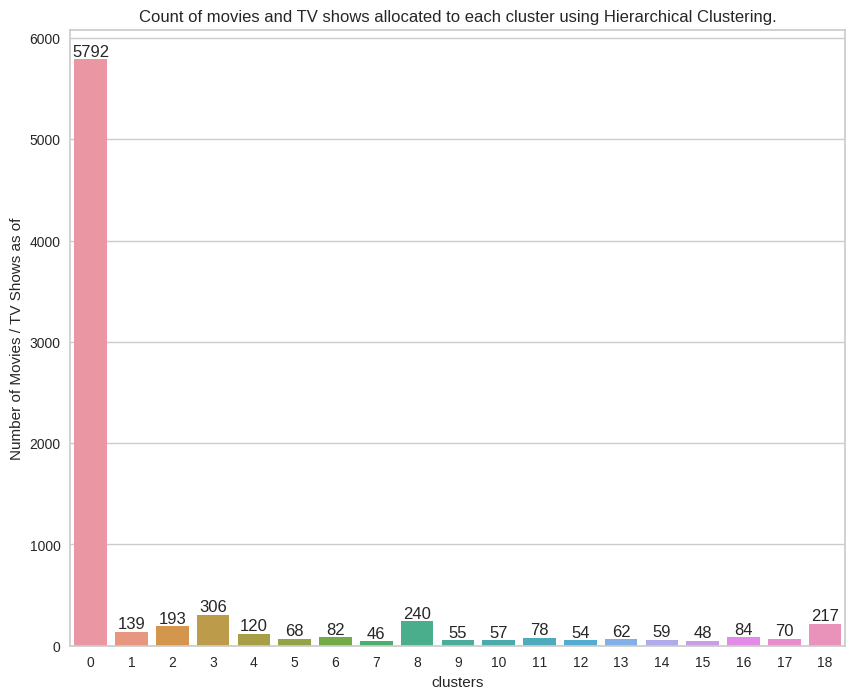

In [269]:
# Determining the count of movies and TV shows assigned to each cluster.

# Construct a dataframe displaying the count of movies and TV shows in each cluster.
nu_datapoint_in_clu = hie_clu_df['cluster'].value_counts().reset_index()

# Plot the bar graph
plt.figure(figsize=(10,8))
ax = sns.barplot(x= nu_datapoint_in_clu['index'], y= nu_datapoint_in_clu['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Count of movies and TV shows allocated to each cluster using Hierarchical Clustering.")
ax.set_xlabel("clusters")
ax.set_ylabel("Number of Movies / TV Shows as of")

Cluster '0' has most number of tv shows and movies followed by cluster '3' and '8'.

**Do DBSCAN Clustering**

In [270]:
# Fitting the DBSCAN model to a dataset.

# Import required dependancy
from sklearn.cluster import DBSCAN
# Fi tthe model
dbscan_mod = DBSCAN(eps=0.0375, min_samples=3)
dbscan_mod.fit(X)

DBSCAN(eps=0.0375, min_samples=3)

In [271]:
# Let's Predict the result
Y_predict = dbscan_mod.labels_
Y_predict

array([-1, -1, -1, ..., -1, -1, -1])

In [289]:
# Assessment of the DBSCAN model's performance.
# A function to assess and visually represent the evaluation metrics of the DBSCAN model.

# Import required dependancy
from tabulate import tabulate
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

def dbscan_clu_evl(model, X , Y_predict):
    """
    Assess a clustering model and present the outcomes.

    Parameters:
    model (object): Clustering model object.
    X (array): Input data.
    Y_predict: Prediction made on model.

    Returns:
    Model evaluation results are as given:
    """

    # Let's so evaluation of metrics
    print('*~'*40)
    print('Evaluation result are :\n')
    sil_score = silhouette_score(X, Y_predict)
    mnk = silhouette_score(X, Y_predict)
    ch_score = calinski_harabasz_score(X, Y_predict)
    db_score = davies_bouldin_score(X, Y_predict)

    # Print the results
    print(f"Number of clusters are : {len(set(Y_predict))}")
    print(f"Silhouette score is : {sil_score}")
    print(f"Calinski-Harabasz score is : {ch_score}")
    print(f"Davies-Bouldin score is: {db_score}")
    print('~*'*40)

    # Data
    met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    evl_result = [sil_score, ch_score, db_score]

    db_met = ['Silhouette score', 'Calinski-Harabasz score', 'Davies-Bouldin score']
    db_evl_result = [sil_score, ch_score, db_score]


    # Create the dataframe
    evl_df = pd.DataFrame({'Evaluation Metrics': met,
                   'Result': evl_result})
    # Print the dataframe
    print(tabulate(evl_df, headers='keys', tablefmt='grid'))
    print('\n', '~*'*40, '\n')

    plt.figure(figsize=(8,6))
    ax = sns.barplot(x= evl_df['Evaluation Metrics'], y= evl_df['Result'])
    ax.bar_label(ax.containers[0])
    ax.set_title("Comparing the Evaluation Metrics")
    ax.set_xlabel("Evaluation Metrics used")
    ax.set_ylabel("Score of evaluation matrix")
    ax.legend(loc="best")

    # Show the plot
    plt.show()
    print('~*'*45)

    return {'Num_clusters':len(set(Y_predict)),'silhouette':sil_score, 'ch_score':ch_score, 'db_score':db_score}


*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~
Evaluation result are :



Number of clusters are : 50
Silhouette score is : -0.25252490311097375
Calinski-Harabasz score is : 5.985688116711106
Davies-Bouldin score is: 1.1694072247867717
~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*
+----+-------------------------+-----------+
|    | Evaluation Metrics      |    Result |
+====+=========================+===========+
|  0 | Silhouette score        | -0.252525 |
+----+-------------------------+-----------+
|  1 | Calinski-Harabasz score |  5.98569  |
+----+-------------------------+-----------+
|  2 | Davies-Bouldin score    |  1.16941  |
+----+-------------------------+-----------+

 ~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~* 



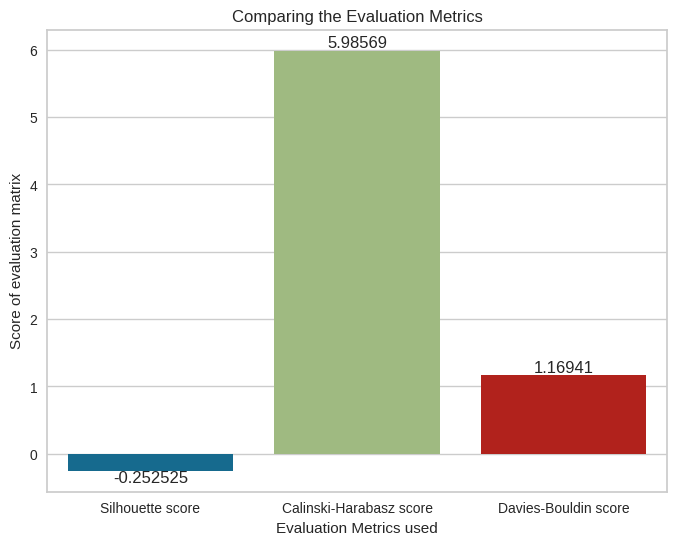

~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*~*


In [273]:
# Let's do Evaluation of Model
dbscan_evl = dbscan_clu_evl(dbscan_mod, X, Y_predict)

Interpreting the metrics, we can say:

Silhouette Score: The silhouette score is negative, which indicates that the clusters are overlapping and not well-separated. A negative silhouette score suggests that the chosen clustering approach might not be effective in capturing distinct clusters.

Calinski-Harabasz Score: The Calinski-Harabasz score is relatively low, implying that the inter-cluster variance is not well-defined. This suggests that the clusters might not be well-separated.

Davies-Bouldin Score: The Davies-Bouldin score is moderate, which indicates that there is some level of separation between the clusters. However, it's not very high, implying that the clusters are not well-defined.

So, the evaluation metrics collectively suggest that the DBSCAN clustering model with 50 clusters might not be performing well. The negative silhouette score, low Calinski-Harabasz score, and moderate Davies-Bouldin score imply that the clusters are not well-separated and might not be meaningful. It could be beneficial to explore alternative clustering methods, reconsider the choice of features, or experiment with different parameter settings to potentially achieve better clustering results.

In [274]:
# Assign movies and TV shows to their respective clusters.

# Copy the dataset
dbscan_mod_df = nfdf.copy()

# Drop the non original features from dataset
dbscan_mod_df.drop(columns={'des_len','con_des', 'punc_%', 'no_sw_pun_des',
                        'cl_des', 'tok_des', 'lem_des',
                        'fi_des', 'fi_des_len'}, axis=1, inplace=True)

# Assigne Movies and TV Shows to its cluster
dbscan_mod_df['cluster'] = dbscan_mod.labels_
dbscan_mod_df.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,-1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,-1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,-1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,-1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,-1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,-1


Text(0, 0.5, 'No. of Movies / TV Shows')

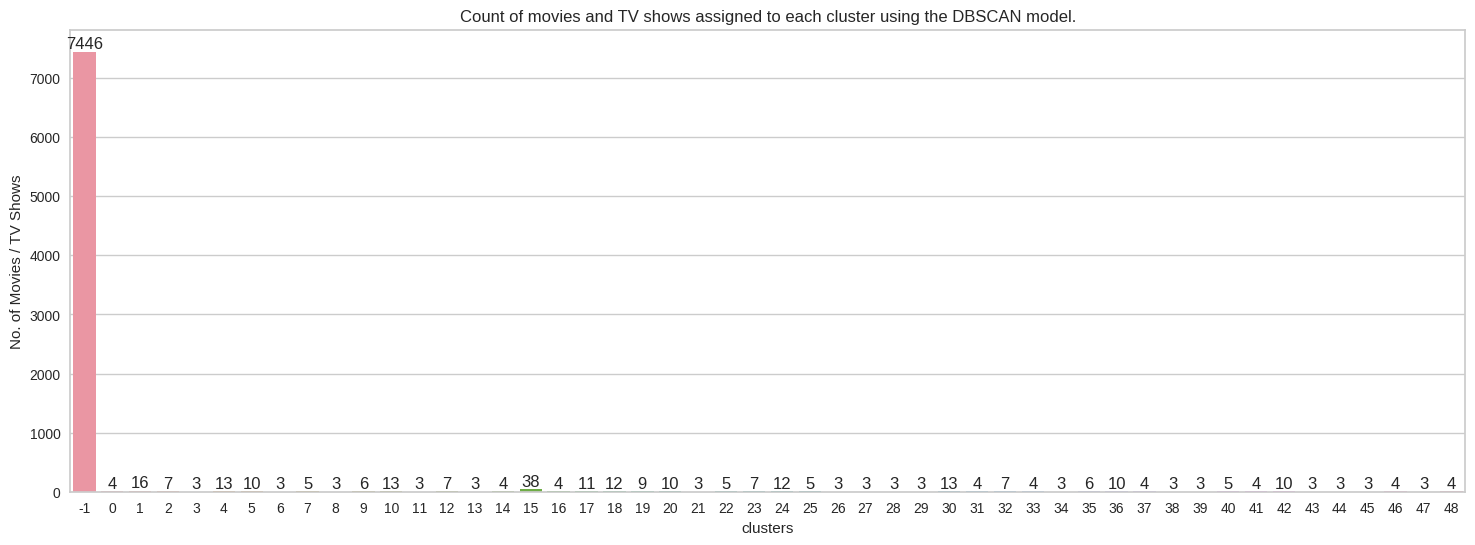

In [275]:
# Determining the count of movies and TV shows allocated to each cluster.

# Construct a dataframe displaying the count of movies and TV shows in each cluster.
num_datapoint_in_clu = dbscan_mod_df['cluster'].value_counts().reset_index()

# Plot the bar plot
plt.figure(figsize=(18,6))
ax = sns.barplot(x= num_datapoint_in_clu['index'],y= num_datapoint_in_clu['cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Count of movies and TV shows assigned to each cluster using the DBSCAN model.")
ax.set_xlabel("clusters")
ax.set_ylabel("No. of Movies / TV Shows")

Cluster '-1' is having the maximum shows.

**Now Compare the Different Models based on the Evaluation Metrics**

In [317]:
# Creating a dataframe containing performance metrics for all constructed models.

# Data
model=['K-Means Clustering','Hierarchical Clustering','DBSCAN Clustering']
silhoue_score=[K_eval['silhouette'], cc['silhouette'], dbscan_evl['silhouette']]
calin_harab_score=[K_eval['ch_score'], cc['ch_score'], dbscan_evl['ch_score']]
dav_boul_score=[K_eval['db_score'], cc['db_score'], dbscan_evl['db_score']]

# Create a dataframe
models_evl_df = pd.DataFrame({'Model Name': model, 'silhouette_score': silhoue_score,
                                     'calinski_harabasz_score': calin_harab_score,
                                     'davies_bouldin_score':dav_boul_score})
# Print the Dataframe
models_evl_df

,Model Name,silhouette_score,calinski_harabasz_score,davies_bouldin_score
0,K-Means Clustering,0.039880,71.695570,4.382713
1,Hierarchical Clustering,-0.252525,5.985688,1.169407
2,DBSCAN Clustering,-0.252525,5.985688,1.169407


BY viewing the performance metrics for these three clustering models:

K-Means Clustering: The silhouette score is 0.039880, indicating that the clusters might be overlapping or not well-separated. The Calinski-Harabasz score is 71.695570, suggesting relatively good inter-cluster variance and compactness. The Davies-Bouldin score is 4.382713, implying some level of cluster separation, but not optimal.

Hierarchical Clustering: The silhouette score is -0.252525, which is negative, suggesting that the clusters are overlapping and not well-separated. The Calinski-Harabasz score is 5.985688, indicating limited inter-cluster variance and compactness. The Davies-Bouldin score is 1.169407, which is relatively low, implying reasonable cluster separation.

DBSCAN Clustering: The silhouette score is -0.252525, similar to the hierarchical clustering, indicating overlapping clusters. The Calinski-Harabasz score is 5.985688, again pointing to limited inter-cluster variance and compactness. The Davies-Bouldin score is 1.169407, consistent with reasonably good cluster separation.

In Short:

K-Means Clustering seems to have the highest Calinski-Harabasz score among the three, indicating better inter-cluster variance and compactness.

Hierarchical Clustering has the lowest silhouette score, suggesting that the clusters might not be well-separated.
Both Hierarchical Clustering and DBSCAN Clustering show relatively low Davies-Bouldin scores, indicating better cluster separation compared to K-Means, but there's still room for improvement.


These conclusions suggest that while none of the models exhibit optimal performance, Hierarchical Clustering and DBSCAN Clustering seem to offer better cluster separation to some extent compared to K-Means Clustering. It's worth further investigating and potentially optimizing the parameters or considering different techniques for improving clustering quality.

However, I will recommend implementing the **Hierarchical Clustering model**, fine-tuning its parameters, and conducting user testing or validation to ensure that the recommendations align well with user preferences and enhance the overall Netflix experience.

How would be my model helpfull to stakeholders?

The choice of the clustering model and its application to content recommendation aligns with the stakeholders' interests by improving user experience, content strategy, decision-making, and competitive positioning. The model's potential impact on user engagement and business outcomes makes it a valuable asset for the organization.



**Conclusion:**

Netflix offers a higher number of movies (69.14%) compared to TV shows (30.86%).

Most Netflix movies were released between 2015 and 2020, while the majority of TV shows came out between 2018 and 2020.

The peak years for releasing movies and TV shows on Netflix were 2017 and 2020, respectively.

From 2006 to 2019, Netflix consistently introduced more new movies than TV shows. However, in 2020, this trend shifted, with more TV shows being released. This indicates a growing emphasis on TV content by Netflix in recent times.

2020 and 2021 witnessed the highest volume of new TV show releases in Netflix's history.

The primary content rating on Netflix is TV-MA, followed by TV-14.

Netflix added a significant portion (27.71%) of its content in 2019.

Content addition was highest in October and January, with regular additions throughout the year.

Netflix boasts a larger selection of movies (69.14%) compared to TV shows (30.86%).

The majority of movies on Netflix are of U.S. origin, with India as the second-most prominent source.

The United States and the United Kingdom are the leading producers of TV shows available on Netflix.

Raul Campos and Jan Suter directed a considerable number of movies on Netflix, while Alastair Fothergill is prominent among TV show directors.

Netflix offers international movies and a significant share of popular dramas.

Common actors in Netflix's abundant content include Lee, Michel, David, Jhon, and James.

A modest correlation exists between the release year and day of the month for movies and TV shows added to Netflix.

The release_year and year_added plot indicates an increasing trend in Netflix's content additions and releases over time.

Based on the release_year and month_added plot, Netflix distributes movies and TV shows consistently throughout the year.

The performance matrics suggest that while none of the models exhibit optimal performance, Hierarchical Clustering and DBSCAN Clustering seem to offer better cluster separation to some extent compared to K-Means Clustering.

However, I will recommend implementing the Hierarchical Clustering model, fine-tuning its parameters, and conducting user testing or validation to ensure that the recommendations align well with user preferences and enhance the overall Netflix experience.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***